# Importing  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import kurtosis,skew 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Dataset

In [2]:
df=pd.read_excel('train.xlsx')

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#                                  Data Preprocessing

In [4]:
#Row data descriptive stats
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [5]:
# Observations:
# There is lot of imbalance in the dataset as we can observe: 
#   a. The scales of collegeGPA are different,
#   b. There is some right skewness is salary distribution as there is difference between mean and median of salary,
#   c. Columns like ID, collegeID,collegeTier,collegeCityID,CollegeCityTier doestn't making any sense to measure them, 
#   d. lots of misleading values in some columns i.e they contain (nan,-1) values.

In [6]:
# Columns name
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

Dropping unnecessary columns

In [7]:
# create a copy of df (raw data)
df1=df.copy()


# Dropping target features except salary since they are unnecessary for our analysis.

drop_target=['DOJ', 'DOL', 'Designation', 'JobCity']

# Dropping some unnecessary features 
drop_features=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID']

# Drop
df1.drop((drop_target + drop_features),axis=1,inplace=True)


In [8]:
Rows_df=df.shape[0]
Columns_df=df.shape[1]
print("There are {} Number of Rows & {} Number of Columns in df Dataset".format(Rows_df,Columns_df))
print('\n')
Rows_df1=df1.shape[0]
Columns_df1=df1.shape[1]
print("After dropping some columns, there are {} Number of Rows & {} Number of Columns in df1 Dataset"
      .format(Rows_df1,Columns_df1))


There are 3998 Number of Rows & 39 Number of Columns in df Dataset


After dropping some columns, there are 3998 Number of Rows & 31 Number of Columns in df1 Dataset


In [9]:
# columns used for model building (after dropping unnecessary columns)
Features = ['Gender', 'DOB', '10percentage', '10board', '12graduation','12percentage', '12board', 'CollegeTier', 'Degree',
            'Specialization', 'collegeGPA', 'CollegeCityTier','CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
            'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
            'TelecomEngg','CivilEngg', 'conscientiousness','agreeableness', 'extraversion', 'nueroticism',
            'openess_to_experience']

Target= ['Salary']

## Data type Treatment

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   10board                3998 non-null   object        
 5   12graduation           3998 non-null   int64         
 6   12percentage           3998 non-null   float64       
 7   12board                3998 non-null   object        
 8   CollegeTier            3998 non-null   int64         
 9   Degree                 3998 non-null   object        
 10  Specialization         3998 non-null   object        
 11  collegeGPA             3998 non-null   float64       
 12  CollegeCityTier        3998 non-null   int64         
 13  Col

In [11]:
#Observations:
# Different types of variables present in this dataset i.e integer (15), float (9), object (6), datetime (1) which are not correct as we can observe all the categorical variables have dtype object and some of them are integer type also.
# we need to convert them according to there actual dtype

In [12]:
# converting mentioned columns into category dtype
df1[['Gender','10board','12board','CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']]=df1[['Gender','10board','12board','CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']].astype('category')
 

In [13]:
df1.dtypes

Salary                            int64
Gender                         category
DOB                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64
ComputerScience                   int64
MechanicalEngg                    int64
ElectricalEngg                    int64
TelecomEngg                       int64


Domain Analysis

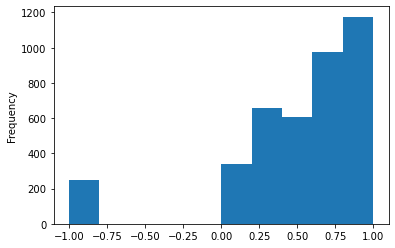

In [14]:
df1.Domain.plot(kind='hist')
plt.show()

In [15]:
# As Domain column is creating Noise in the Data, and we have already have the branch wise marks distribution therefore, 
# Dropping the domain column seems to be an optimal approach.

In [16]:
df1.drop('Domain',axis=1,inplace=True)

Missing values Treatment

In [17]:
# Replacing '-1' and 'NaN' with 0

df1.isin([-1, 'NaN']).sum()

Salary                      0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [18]:
engineering_scores=['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
               'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

for i in engineering_scores:
    df1[i].replace(to_replace = -1, value = 0, inplace = True)

print(df1.isin([-1, 'NaN']).sum())

Salary                   0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64


Bringing the CGPA to  0-100 scale

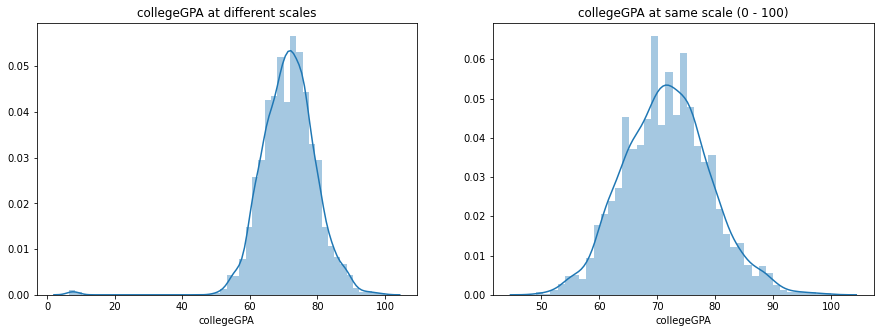

Skewness : 0.16994031794486156
Kurtosis : 0.08006424149767177

Mean : 71.69572786393196
Median : 71.8
Standard deviation : 7.406630923990481


In [19]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df1['collegeGPA'],ax=axes[0])
axes[0].set_title('collegeGPA at different scales')

df1.loc[df1['collegeGPA']<=10,'collegeGPA']*=10
sns.distplot(df1['collegeGPA'],ax=axes[1])
axes[1].set_title('collegeGPA at same scale (0 - 100)')
plt.show()

print('Skewness :',df1['collegeGPA'].skew())
print('Kurtosis :',df1['collegeGPA'].kurt())
print()
print('Mean :',df1['collegeGPA'].mean())
print('Median :',df1['collegeGPA'].median())
print('Standard deviation :',df1['collegeGPA'].std())

In [20]:
# Observation:
# collegeGPA marks are normally distributed and on an average most of the candidates scored around 71.6 %. 

Grouping different specialization into core disciplines

Number of unique Specialization : 46

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                        

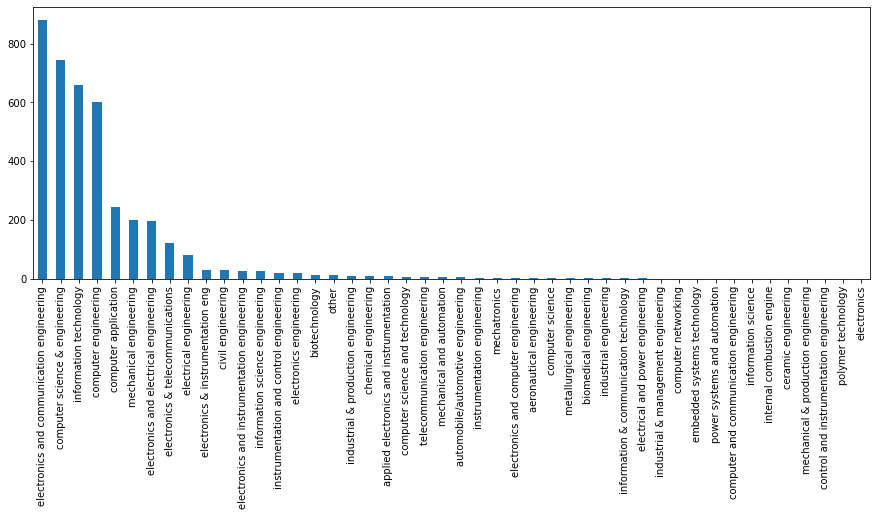

In [21]:
print("Number of unique Specialization :",df1['Specialization'].nunique())
print()
print(df1['Specialization'].value_counts())
print()
specialization_freq = df1['Specialization'].value_counts()
specialization_freq.plot(kind = 'bar', figsize = (15, 5))
plt.show()

In [22]:
# Observation:
# There are 46 specialization classes but the names of some classes seems similar and some of them have very few records, 
# so we are making groups of similar specialization classes and put some of them in other specialization as they have very few records.

# group names: 
# EC = Electronic and Communication
# CS = Computer Science
# other = All other specializations

In [23]:
specialization_group =\
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'other',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'other',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'other',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'other',
 'automobile/automotive engineering' : 'other',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'other',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'other',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'other',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'other',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'other',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'other',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'other']

CS       2289
EC       1319
other     390
Name: Specialization, dtype: int64



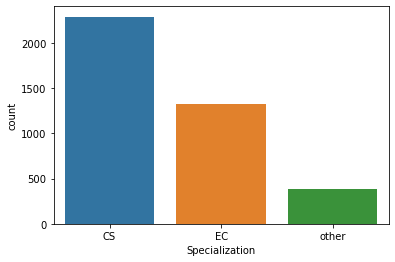

In [24]:
df1['Specialization'] = df1['Specialization'].map(specialization_group)

print(df1['Specialization'].unique())
print()
print(df1['Specialization'].value_counts())

print()
sns.countplot(df1['Specialization'])

plt.show()

Analysing Salary distribution

mean marks scored  307699.8499249625
median marks scored 300000.0

Skewness: 6.44866054831297
Kurtosis: 80.82731823061802



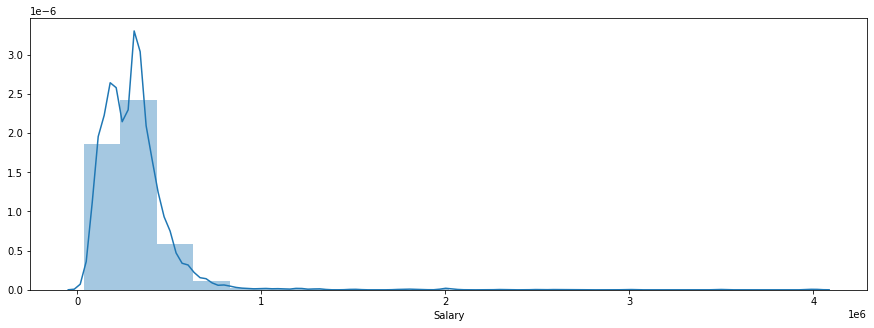

In [25]:
print('mean marks scored ',df1['Salary'].mean())
print('median marks scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

In [26]:
# Observation:
# Salary of employees is not normally distributed i.e there is a right skewness in salary as there are outliers exist the 
# dataset and the kurtosis is very high as mostly employees got there starting package of Rs 300000

mean marks scored  285447.1586526099
median marks scored 300000.0

Skewness: 0.43205376284764696
Kurtosis: -0.2651888576188304



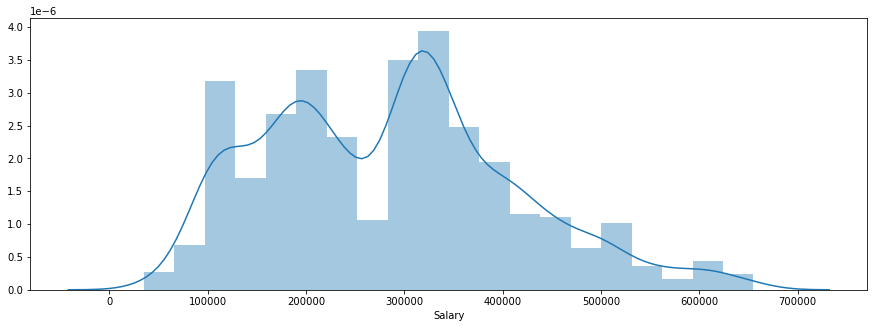

In [27]:
Q1=df1['Salary'].quantile(0.25)
Q2=df1['Salary'].quantile(0.5)
Q3=df1['Salary'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df1=df1[(df1['Salary']>=LL)&(df1['Salary']<=UL)]

print('mean marks scored ',df1['Salary'].mean())
print('median marks scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

Analysing age of candidates vs salary: 

In [28]:
df1['DOB'].unique

<bound method Series.unique of 0      1990-02-19
1      1989-10-04
2      1992-08-03
4      1991-02-27
5      1992-07-02
          ...    
3993   1987-04-15
3994   1992-08-27
3995   1991-07-03
3996   1992-03-20
3997   1991-02-26
Name: DOB, Length: 3889, dtype: datetime64[ns]>

In [29]:
# Analysis only on the basis of years

df1['DOByear']=df1['DOB'].dt.year # Date of birth year
df1.drop('DOB',axis=1,inplace=True)
# Creating new feature to calculate the age of candidates after completing 12th.

df1['12thAge']=abs(df1['12graduation']-df1['DOByear'])

# Creating new feature to calculate the age of candidates after completing graduation.

df1['GradAge']=abs(df1['GraduationYear']-df1['DOByear'])

In [30]:
df1['12thAge'].value_counts()

18    1784
17    1445
19     365
16     194
20      55
15      17
21      16
22       8
13       2
25       1
23       1
24       1
Name: 12thAge, dtype: int64

In [31]:
#In 12th age, neglecting students with age>22 and age<15 by logic.

In [32]:
df1

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOByear,12thAge,GradAge
0,420000,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,CS,...,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1990,17,21
1,500000,m,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,EC,...,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,1989,18,23
2,325000,f,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,CS,...,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1992,18,22
4,200000,m,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,EC,...,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1991,17,21
5,300000,m,89.92,state board,2010,87.00,state board,2,B.Tech/B.E.,EC,...,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1992,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,m,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,CS,...,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,1987,19,23
3994,100000,f,90.00,state board,2009,93.00,state board,2,B.Tech/B.E.,EC,...,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,1992,17,21
3995,320000,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,CS,...,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1991,17,21
3996,200000,f,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,CS,...,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1992,18,22


In [33]:
df1=df1[(df1['12thAge']<22) &(df1['12thAge']>15)]

In [34]:
df1

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOByear,12thAge,GradAge
0,420000,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,CS,...,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1990,17,21
1,500000,m,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,EC,...,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,1989,18,23
2,325000,f,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,CS,...,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1992,18,22
4,200000,m,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,EC,...,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1991,17,21
5,300000,m,89.92,state board,2010,87.00,state board,2,B.Tech/B.E.,EC,...,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1992,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,m,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,CS,...,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,1987,19,23
3994,100000,f,90.00,state board,2009,93.00,state board,2,B.Tech/B.E.,EC,...,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,1992,17,21
3995,320000,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,CS,...,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1991,17,21
3996,200000,f,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,CS,...,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1992,18,22


In [35]:
df1['12thAge'].value_counts()

18    1784
17    1445
19     365
16     194
20      55
21      16
Name: 12thAge, dtype: int64

In [36]:
df1['GradAge'].value_counts()

22      1677
21      1004
23       715
24       259
25        81
20        53
26        45
27        13
28         8
1991       1
29         1
19         1
34         1
Name: GradAge, dtype: int64

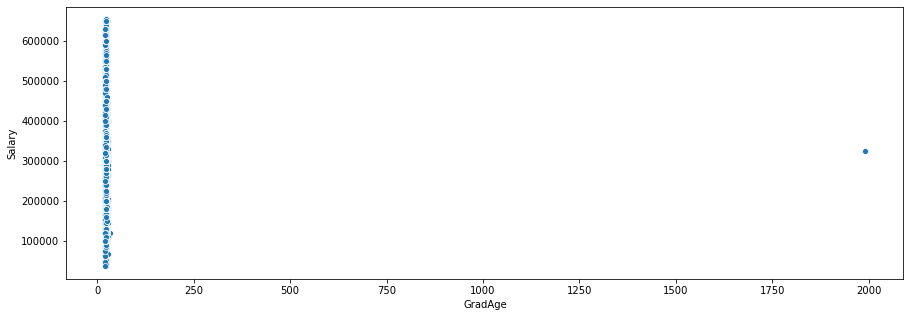

In [37]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.show()

In [38]:
# Observation:
# there is a missing value in graduation year as 1991 indicating dob year
# So we can impute this missing value in graduation year by median of graduation year

In [39]:
df1['GraduationYear'].median()

2013.0

In [40]:
df1['GraduationYear'].replace(to_replace = 0, value = 2013, inplace = True)

In [41]:
df1['GradAge']=abs(df1['GraduationYear']-df1['DOByear'])

In [42]:
df1['GradAge'].value_counts()

22    1678
21    1004
23     715
24     259
25      81
20      53
26      45
27      13
28       8
29       1
19       1
34       1
Name: GradAge, dtype: int64

In [43]:
#In grad age, neglecting gradage<19 and gradage=34 by logic.

In [44]:
df1=df1[(df1['GradAge']>19) & (df1['GradAge']<29)]

In [45]:
df1['GradAge'].value_counts()

22    1678
21    1004
23     715
24     259
25      81
20      53
26      45
27      13
28       8
Name: GradAge, dtype: int64

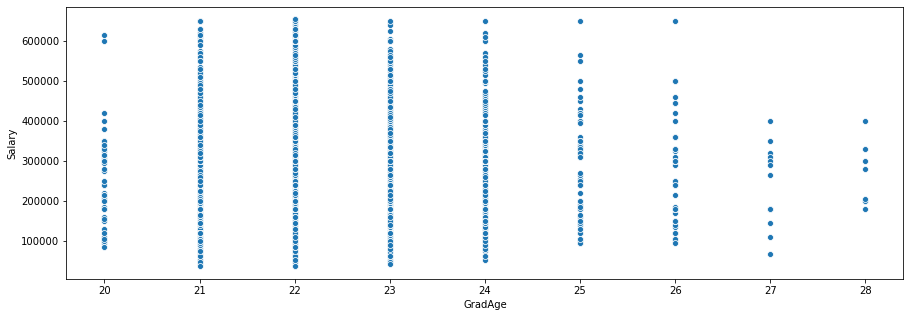

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.show()

In [47]:
# Dropping Graduation Year, 12th graduation year and DOB year column

In [48]:
df1.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'DOByear', '12thAge', 'GradAge'],
      dtype='object')

In [49]:
df1.drop('GraduationYear',axis=1,inplace=True)
df1.drop('12graduation',axis=1,inplace=True)
df1.drop('DOByear',axis=1,inplace=True)

Dividing 12board into different groups: 

In [50]:
print(df1['12board'].value_counts())

cbse                                                               1355
state board                                                        1232
0                                                                   336
icse                                                                127
up board                                                             82
                                                                   ... 
s j polytechnic                                                       0
msbte (diploma in computer technology)                                0
punjab state board of technical education & industrial training       0
intermideate                                                          0
west bengal state council of technical education                      0
Name: 12board, Length: 340, dtype: int64


In [51]:
# Imputing missing values in 12boards with cbse board as most of the students are appearing from state board

In [52]:
df1['12board'].replace(to_replace=0, value='cbse', inplace=True)

In [53]:
df1['12board'].nunique()

323

In [54]:
# Observation:
#there are 323 unique 12board available in this feature but the records for some of the boards are very less 
#so divided 12board into 3 groups which are : cbse, state, icse. 

In [55]:
print(df1['12board'].value_counts())

cbse                                                1691
state board                                         1232
icse                                                 127
up board                                              82
isc                                                   39
                                                    ... 
gujarat board                                          0
maharashtra state board mumbai divisional board        0
board of intermediate,ap                               0
cbse board                                             0
west bengal state council of technical education       0
Name: 12board, Length: 339, dtype: int64


In [56]:
state_board_list=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board',
       'up bord', 'gujarat board', 'intermideate','west bengal state council of technical education'
       'ghseb']

In [57]:
# dividing 12board column in 3 groups : 'state','cbse','icse'.
for i in state_board_list:
    df1['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df1['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df1['12board'].replace(i,'icse',inplace=True)
df1['12board'].unique()

[state, cbse, icse]
Categories (3, object): [state, cbse, icse]

state    1992
cbse     1694
icse      170
Name: 12board, dtype: int64



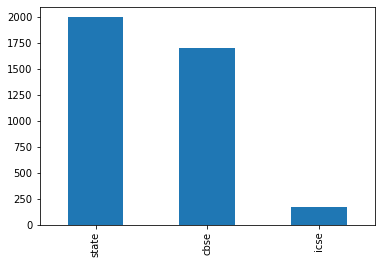

In [58]:
print(df1['12board'].value_counts())
print()
(df1['12board'].value_counts().plot(kind='bar'))
plt.show()

In [59]:
df1['10board'].value_counts()

cbse                  1350
state board           1140
0                      328
icse                   268
ssc                    117
                      ... 
sslc,karnataka           0
hse,orissa               0
gsheb                    0
gujarat board            0
up board allahabad       0
Name: 10board, Length: 275, dtype: int64

In [60]:
# replacing 0 with cbse as it is most frequent in 10board.
df1['10board'].replace(to_replace = 0, value = 'cbse', inplace = True)

In [61]:
df1['10board'].value_counts()

cbse                  1678
state board           1140
icse                   268
ssc                    117
up board                80
                      ... 
sslc,karnataka           0
gsheb                    0
gujarat board            0
hse,orissa               0
up board allahabad       0
Name: 10board, Length: 274, dtype: int64

In [62]:
state_board_list=['board ofsecondary education,ap', 'state board',
       'mp board bhopal','cbsc' ,
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
        'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board','board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school',  'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'bihar school examination board patna',
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'council for indian school certificate examination',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

In [63]:
for i in state_board_list:
    df1['10board'].replace(i,'state',inplace=True)

cbse_board_list =['cbse', 'central board of secondary education','cbese','cbse board','cbse[gulf zone]','cbse ',
                  'central board of secondary education, new delhi']

for i in cbse_board_list:
    df1['10board'].replace(i,'cbse',inplace=True)

icse_board_list=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi','icse board , new delhi','icse board']
for i in icse_board_list:
    df1['10board'].replace(i,'icse',inplace=True)


state    1889
cbse     1696
icse      271
Name: 10board, dtype: int64



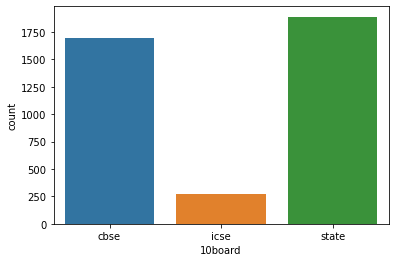

In [64]:
print(df1['10board'].value_counts())
print()
sns.countplot(df1['10board'])
plt.show()

B.Tech/B.E.      3574
MCA               232
M.Tech./M.E.       48
M.Sc. (Tech.)       2
Name: Degree, dtype: int64


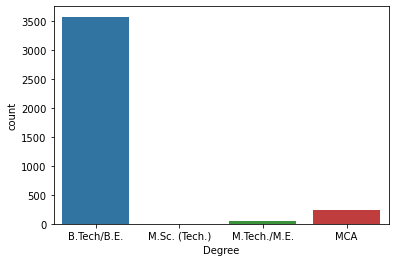

In [65]:
print(df1['Degree'].value_counts())
sns.countplot(df1['Degree'])
plt.show()

In [66]:
#As records of students having MCA, Mtech, Msc degree are less so we can combine them under one category as 'PG'
#and B.Tech/B.E. under UG degree

In [67]:
Degree ={
'B.Tech/B.E.' : 'UG',
    'MCA' : 'PG',
    'M.Tech./M.E.' : 'PG',
    'M.Sc. (Tech.)' : 'PG'}

In [68]:
df1['Degree'] = df1.Degree.map(Degree)

In [69]:
df1.Degree.value_counts()

UG    3574
PG     282
Name: Degree, dtype: int64

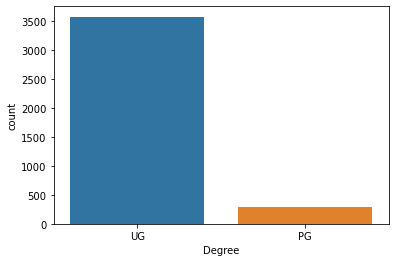

In [70]:
sns.countplot(df1['Degree'])
plt.show()

In [71]:
# To Reduce dimensions we are converting states into 6 zones
df1['CollegeState'].unique()

[Andhra Pradesh, Madhya Pradesh, Uttar Pradesh, Karnataka, Tamil Nadu, ..., Bihar, Assam, Sikkim, Union Territory, Meghalaya]
Length: 25
Categories (25, object): [Andhra Pradesh, Madhya Pradesh, Uttar Pradesh, Karnataka, ..., Assam, Sikkim, Union Territory, Meghalaya]

In [72]:
CollegeState_zone =\
{
'Himachal Pradesh': 'North_Zone.',
    'Punjab': 'North_Zone.',
    'Uttarakhand': 'North_Zone.',
    'Uttar Pradesh' : 'North_Zone.',
    'Haryana' : 'North_Zone.',
    
    'Andhra Pradesh' : 'South_Zone.',
    'Karnataka' : 'South_Zone.',
    'Kerala' : 'South_Zone.',
    'Tamil Nadu' : 'South_Zone.',
    'Telangana' : 'South_Zone.',
    
    'Bihar' : 'Other_Zone',
    'Orissa' : 'Other_Zone',
    'Jharkhand' : 'Other_Zone',
    'West Bengal' : 'Other_Zone',
    'Rajasthan'  : 'Other_Zone',
    'Gujarat' : 'Other_Zone',
    'Goa' : 'Other_Zone',
    'Maharashtra' : 'Other_Zone',
    'Madhya Pradesh' : 'Other_Zone', 
    'Chhattisgarh' : 'Other_Zone',
    'Assam' : 'Other_Zone',
    'Sikkim' : 'Other_Zone',
    'Nagaland' : 'Other_Zone',
    'Meghalaya' : 'Other_Zone',
    'Manipur' : 'Other_Zone',
    'Mizoram' : 'Other_Zone',
    'Tripura' : 'Other_Zone',
    'Arunachal Pradesh' : 'Other_Zone',
    'Union Territory' : 'Other_Zone',
    'Jammu and Kashmir' : 'Other_Zone',
    'Delhi' : 'Other_Zone'
    
}

['South_Zone.' 'Other_Zone' 'North_Zone.']

North_Zone.    1360
South_Zone.    1285
Other_Zone     1211
Name: CollegeState, dtype: int64



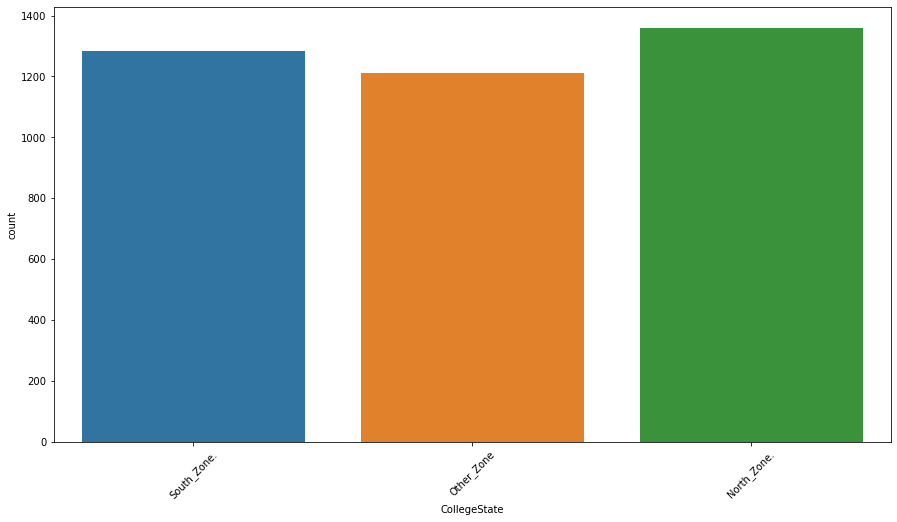

In [73]:
df1['CollegeState'] = df1['CollegeState'].map(CollegeState_zone)

print(df1['CollegeState'].unique())
print()
print(df1['CollegeState'].value_counts())

print()
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 45)
sns.countplot(df1['CollegeState'])
plt.show()

In [74]:
df1.isnull().sum()

Salary                   0
Gender                   0
10percentage             0
10board                  0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
English                  0
Logical                  0
Quant                    0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
12thAge                  0
GradAge                  0
dtype: int64

mean marks scored  71.64910788381738
median marks scored 71.755

Skewness: 0.15439714653265404
Kurtosis: 0.056734307175139165



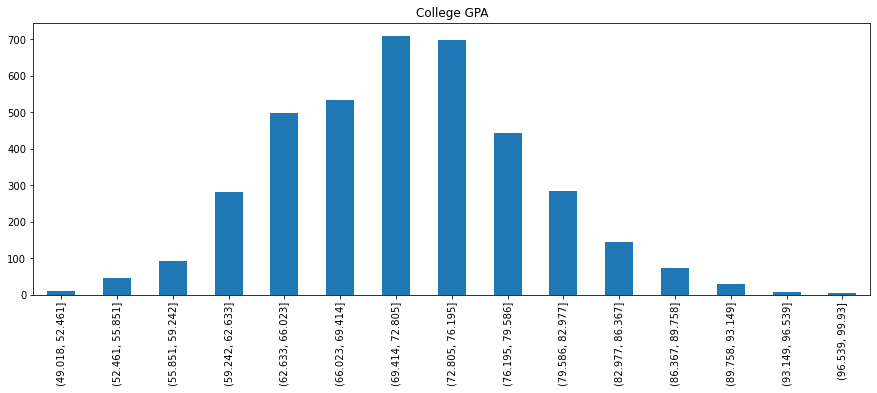

In [75]:
# Distribution of College grades

print('mean marks scored ',df1['collegeGPA'].mean())
print('median marks scored',df1['collegeGPA'].median())

print()

print('Skewness:',skew(df1['collegeGPA']))
print('Kurtosis:',kurtosis(df1['collegeGPA']))

print()

plt.figure(figsize=(15,5))
df1['collegeGPA'].value_counts(bins=15,sort=False).plot(kind='bar',title='College GPA')
plt.show()

In [76]:
# Created 3 bins based on collegeGPA as 0, 1 and 2 [0- low marks, 1-medium marks and 2-High marks]

In [77]:
df1['collegeGPA']=pd.cut(df1.collegeGPA,bins=[33,60,75,100],labels=[0,1,2])

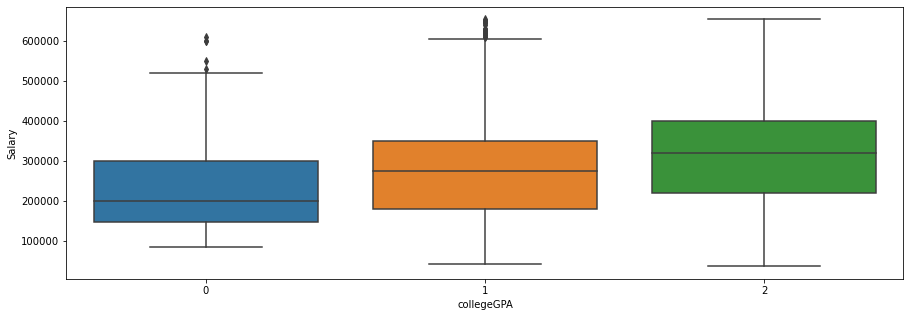

In [78]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['collegeGPA'],df1['Salary'])
plt.show()

mean marks scored  74.46320280082973
median marks scored 74.4

Skewness: -0.029723464228976145
Kurtosis: -0.6261132870363975



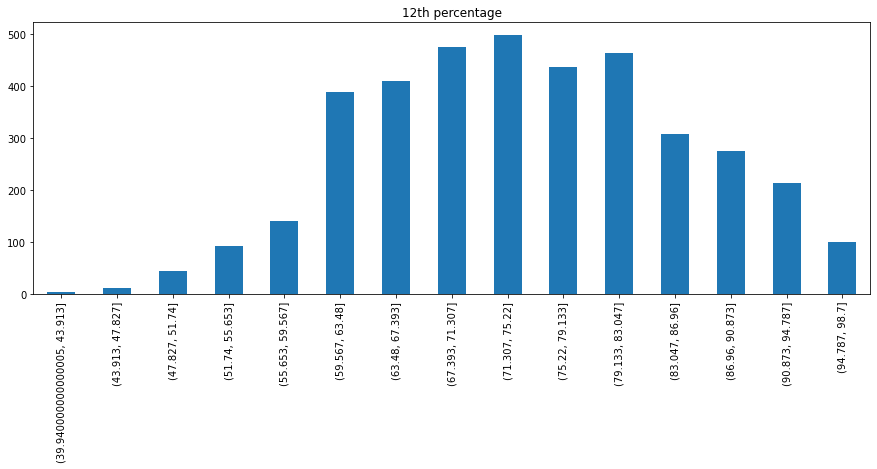

In [79]:
# Distribution of 12th percentage

print('mean marks scored ',df1['12percentage'].mean())
print('median marks scored',df1['12percentage'].median())

print()

print('Skewness:',skew(df1['12percentage']))
print('Kurtosis:',kurtosis(df1['12percentage']))

print()

plt.figure(figsize=(15,5))
df1['12percentage'].value_counts(bins=15,sort=False).plot(kind='bar',title='12th percentage')
plt.show()

In [80]:
# Created three bins based on 12th percentage marks as 0, 1 and 2. [0-low marks, 1-medium marks, 2-high marks]

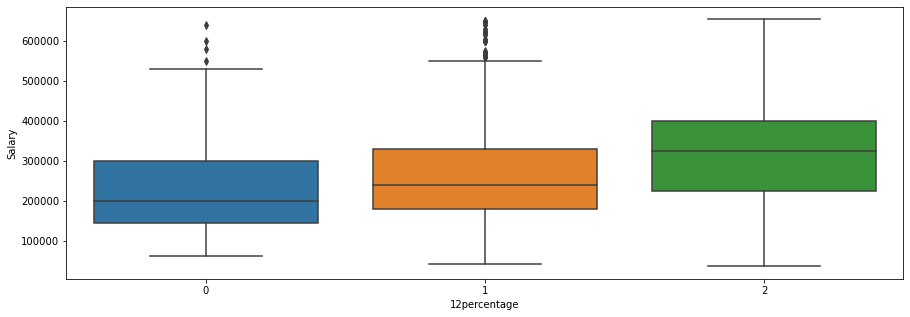

In [81]:
df1['12percentage']=pd.cut(df1['12percentage'],bins=[33,60,75,100],labels=[0,1,2])


plt.figure(figsize=(15,5))
sns.boxplot(df1['12percentage'],df1['Salary'])
plt.show()

mean marks scored  77.91857883817424
median marks scored 79.0

Skewness: -0.5901644552255424
Kurtosis: -0.09797302498685223



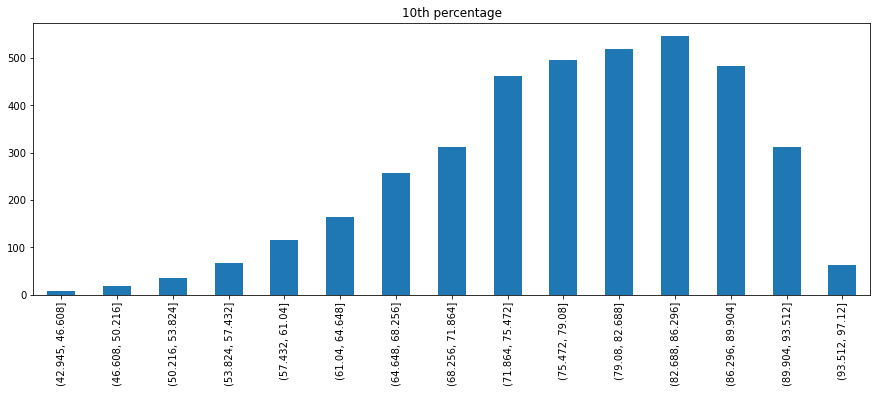

In [82]:
# Distribution of 10th percentage

print('mean marks scored ',df1['10percentage'].mean())
print('median marks scored',df1['10percentage'].median())
print()
print('Skewness:',skew(df1['10percentage']))
print('Kurtosis:',kurtosis(df1['10percentage']))
print()

plt.figure(figsize=(15,5))
df1['10percentage'].value_counts(bins=15,sort=False).plot(kind='bar',title='10th percentage')
plt.show()

In [83]:
# Created three bins based on 10th percentage marks as 0, 1 and 2. [0-low marks, 1-medium marks, 2-high marks]

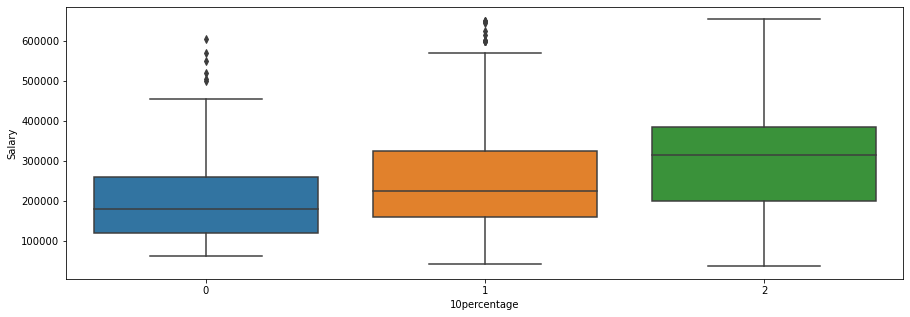

In [84]:
df1['10percentage']=pd.cut(df1['10percentage'],bins=[33,60,75,100],labels=[0,1,2])


plt.figure(figsize=(15,5))
sns.boxplot(df1['10percentage'],df1['Salary'])
plt.show()

In [85]:
df1

,Salary,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12thAge,GradAge
0,420000,f,2,state,2,state,2,UG,CS,2,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,17,21
1,500000,m,2,cbse,2,cbse,2,UG,EC,1,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,18,23
2,325000,f,2,cbse,1,cbse,2,UG,CS,1,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,18,22
4,200000,m,2,cbse,2,cbse,2,UG,EC,1,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,17,21
5,300000,m,2,state,2,state,2,UG,EC,2,...,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,m,0,cbse,0,cbse,2,UG,CS,1,...,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,19,23
3994,100000,f,2,state,2,state,2,UG,EC,2,...,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943,17,21
3995,320000,m,2,state,1,state,2,UG,CS,1,...,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,17,21
3996,200000,f,2,state,1,state,2,UG,CS,1,...,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,18,22


# Data Visualization

### Univariate Analysis

### 1. Gender Ratio Distribution

Number of males: 2927
Number of females: 929
Male to Female Gender Ratio: 3.15



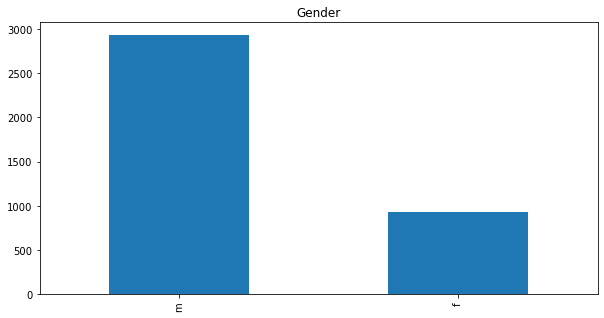

In [86]:
males = df1['Gender'].where(df1['Gender'] == 'm').count()
females = df1['Gender'].where(df1['Gender'] == 'f').count()
print("Number of males: {}".format(males))
print("Number of females: {}".format(females))
print("Male to Female Gender Ratio: {:.2f}".format(males / females))
print()
df1['Gender'].value_counts().plot(kind = 'bar', title = 'Gender', figsize = (10, 5))
plt.show()

In [87]:
#More male candidates than female candidates.

### 2.Academic scores distribution

#### 10th percentage 

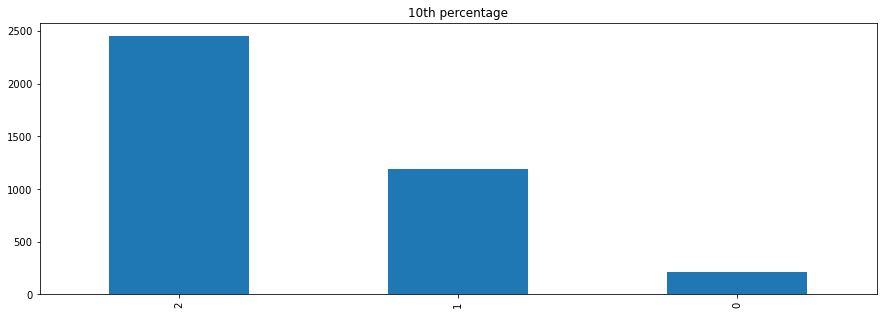

In [88]:
# Distribution of 10th percentage

plt.figure(figsize=(15,5))
df1['10percentage'].value_counts().plot(kind='bar',title='10th percentage')
plt.show()

In [89]:
# Observation:
# 1. Data is left skewed as some candidates didn't perform well in 10th standerd which impacts average score of all canditates 
#    i.e reduces the average scores as seen above mean= 77.92% & Median= 79.15%
# 2. Most of the students score around 79% marks

#### 12th percentage 

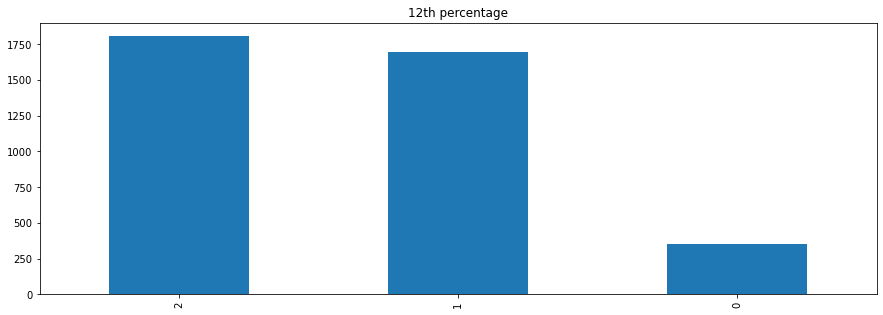

In [90]:
# Distribution of 12th percentage

plt.figure(figsize=(15,5))
df1['12percentage'].value_counts().plot(kind='bar',title='12th percentage')
plt.show()

In [91]:
# Observations:
# 1. 12 class scores are normally distributed as most of the student scores around 74.4 %.
# 2. Hence 12 class scores are less than 10 class scores.

#### College GPA 

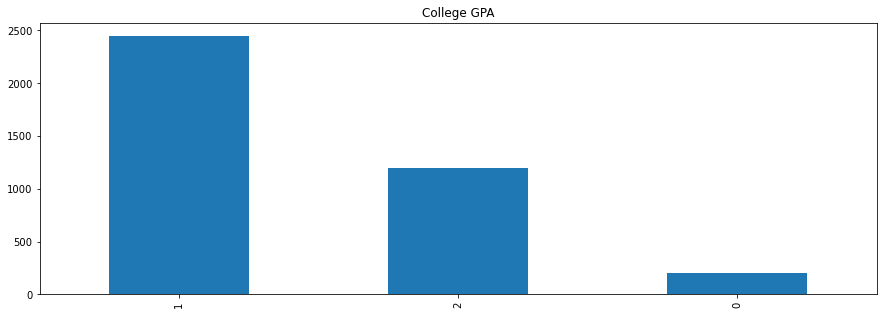

In [92]:
# Distribution of College grades

plt.figure(figsize=(15,5))
df1['collegeGPA'].value_counts().plot(kind='bar',title='College GPA')
plt.show()

In [93]:
# Observation:
# 1. Distribution of college GPA is approximately normal and most of students scored 71.7% in college 

### 3. College Tier distribution

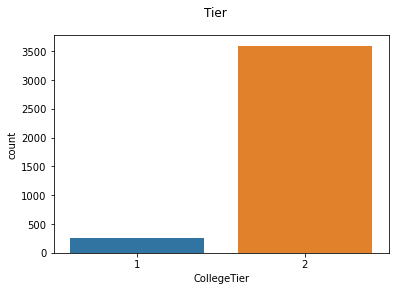

In [94]:
# Distribution of College Tier

sns.countplot(df1['CollegeTier'])
plt.suptitle('Tier')
plt.show()

In [95]:
df1['CollegeTier'].value_counts()

2    3594
1     262
Name: CollegeTier, dtype: int64

In [96]:
# Observation:
# Students from college Tier 2 are higher in number


### 4. Degree distribution 

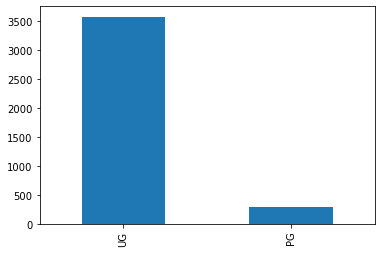

In [97]:
df1['Degree'].value_counts().plot(kind='bar')

In [98]:
# Observations:
# UG students are greater than students having PG degree.

### 5. Specialization distribution 

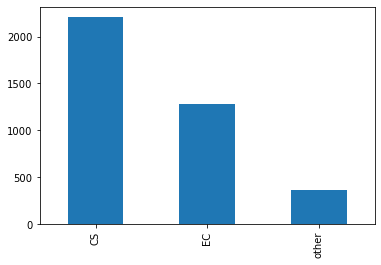

In [99]:
df1['Specialization'].value_counts().plot(kind='bar')
plt.show()

In [100]:
# Observation:
# Students having specialization in computer science are higher in number.


### 6. 10 board distribution

state    1889
cbse     1696
icse      271
Name: 10board, dtype: int64



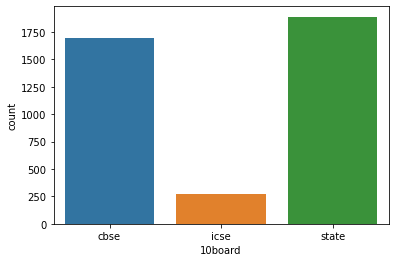

In [101]:
print(df1['10board'].value_counts())

print()

sns.countplot(df1['10board'])
plt.show()

In [102]:
#Observation:
#Most of the class10 students are from state board

### 7. 12board distribution 

state    1992
cbse     1694
icse      170
Name: 12board, dtype: int64



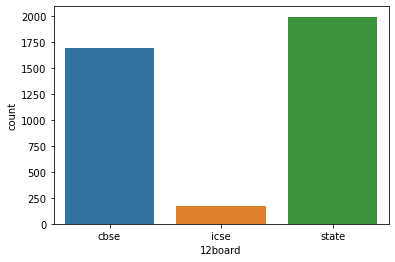

In [103]:
print(df1['12board'].value_counts())

print()

sns.countplot(df1['12board'])
plt.show()

In [104]:
#Observation:
#Most of the class12 students are from state board

### Distribution of Salary

mean marks scored  285654.5643153527
median marks scored 300000.0

Skewness: 0.42654396592085186
Kurtosis: -0.2705864858712492



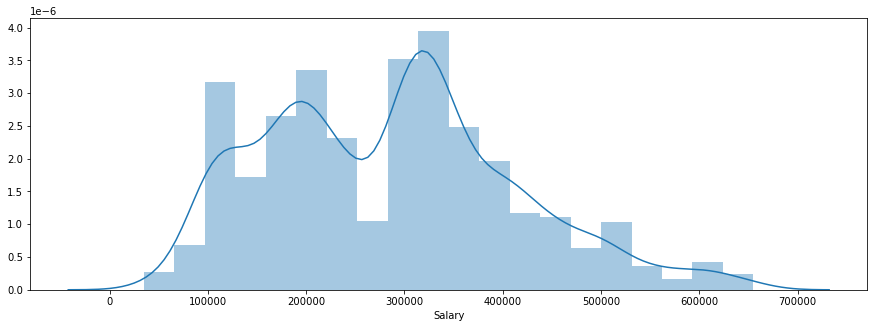

In [105]:
print('mean marks scored ',df1['Salary'].mean())
print('median marks scored',df1['Salary'].median())

print()

print('Skewness:',skew(df1['Salary']))
print('Kurtosis:',kurtosis(df1['Salary']))

print()

plt.figure(figsize=(15,5))
sns.distplot(df1['Salary'],bins=20, kde=True,hist=True)
plt.show()

## Bivariate analysis 

# Features Comparison with target(Salary)

### 1. Salary vs Gender

Gender
f    278067.814855
m    288062.521353
Name: Salary, dtype: float64
Gender
f    300000
m    300000
Name: Salary, dtype: int64



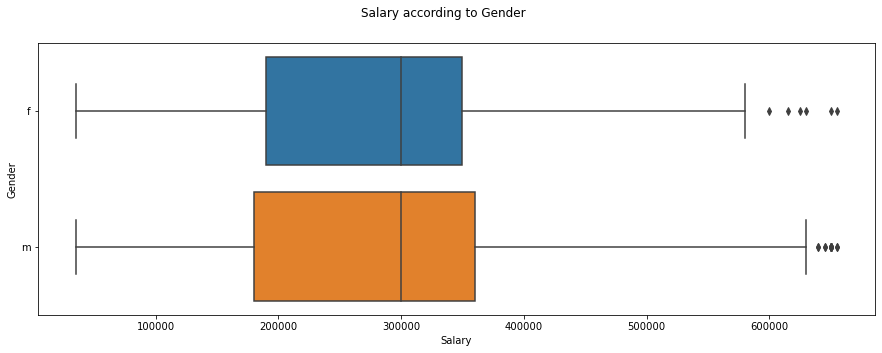

In [106]:
# Does gender affect salaries ?

print(df1.groupby('Gender')['Salary'].mean())
print(df1.groupby('Gender')['Salary'].median())

print()
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary', y = 'Gender', data=df1)
plt.suptitle('Salary according to Gender')
plt.show()

In [107]:
# Observation:

# 1 Mean salary of males is slightly greater than females salary.
# 2 Median salary earned by both the genders are equal

### 2. Salary vs college state 

CollegeState
North_Zone.    276775.000000
Other_Zone     289521.056978
South_Zone.    291408.560311
Name: Salary, dtype: float64



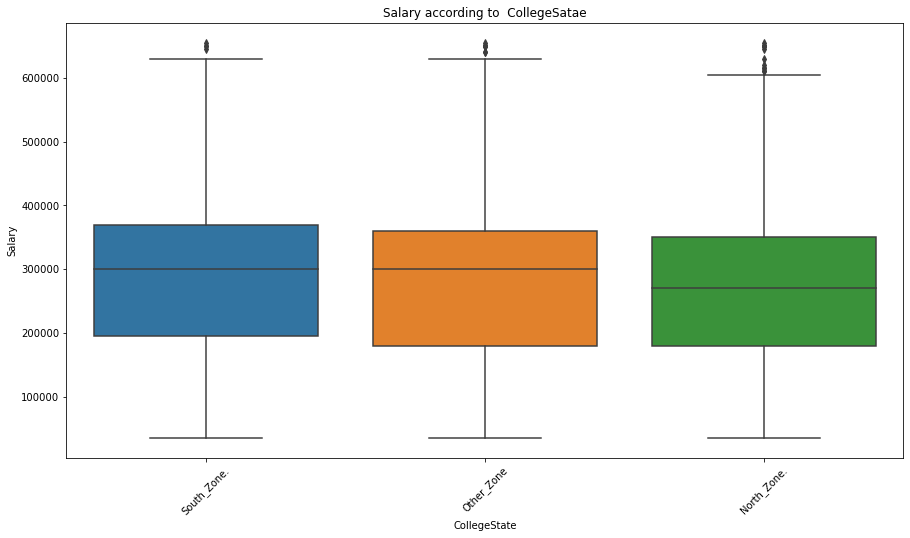

In [108]:
# Does location of college affect salaries of Candidates?

print(df1.groupby('CollegeState')['Salary'].mean())
print()

plt.figure(figsize = (15, 8))
plt.xticks(rotation = 45)
sns.boxplot(x = 'CollegeState', y = 'Salary', data = df1)
plt.title('Salary according to  CollegeSatae')
plt.show()

In [109]:
# Observation:
# There is huge affect of college loaction on salaries of Candidates as it clearly visible above some college candidates 
# hired at good package and some are getting very low package, median salary of students from Meghalaya and Jammu&Kashmir is higher.

### 3. Salary vs Degree

Degree
PG    254326.241135
UG    288126.468942
Name: Salary, dtype: float64



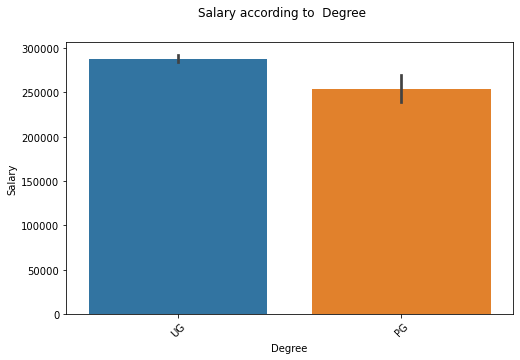

In [110]:
# Does degree awarded affect salaries of Candidates?

print(df1.groupby('Degree')['Salary'].mean())

print()

plt.figure(figsize = (8, 5))
plt.xticks(rotation = 45)
sns.barplot(x = 'Degree', y = 'Salary', data = df1)
plt.suptitle('Salary according to  Degree')
plt.show()

In [111]:
# Observation:
# There is not much difference in median salary earned by different degree holders but it's clearly visible that UG degree Candidates 
# are getting huge packages as compare to other PG degree candidates.

### 4. Salary vs Specialization 

Specialization
CS       288821.396192
EC       282677.042802
other    276997.260274
Name: Salary, dtype: float64
Specialization
CS       300000
EC       300000
other    275000
Name: Salary, dtype: int64



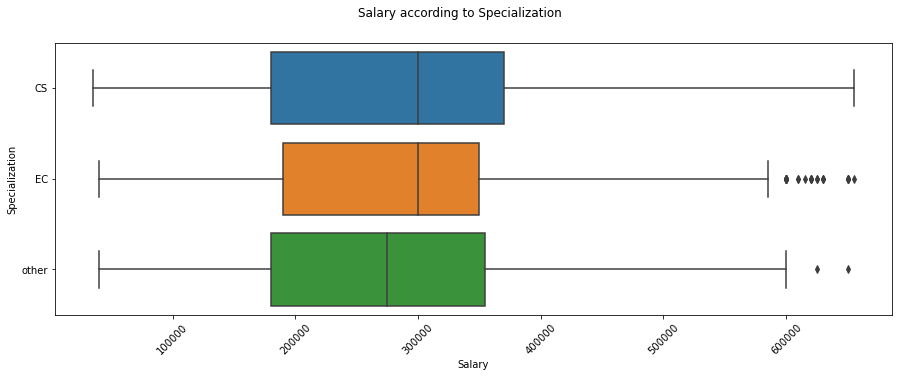

In [112]:
# Does specialization affect salary ?

print(df1.groupby('Specialization')['Salary'].mean())
print(df1.groupby('Specialization')['Salary'].median())

print()

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.boxplot(x='Salary', y = 'Specialization', data=df1)
plt.suptitle('Salary according to Specialization')
plt.show()

In [113]:
#Observation:
#The median salary of CS and EC is almost same.

### 5. Salary vs CollegeTier 

CollegeTier
1    367595.419847
2    279681.135225
Name: Salary, dtype: float64



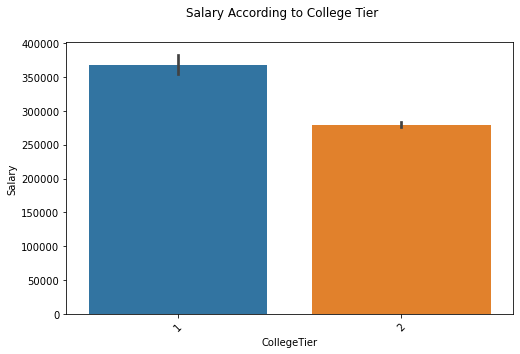

In [114]:
print(df1.groupby('CollegeTier')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = 'CollegeTier',y='Salary',data=df1)
plt.suptitle('Salary According to College Tier')
plt.show()

In [115]:
#Observations:
#Salary of students from Tier1 college is high.

### 6. Salary vs 10 board

10board
cbse     303820.754717
icse     306107.011070
state    266410.269984
Name: Salary, dtype: float64



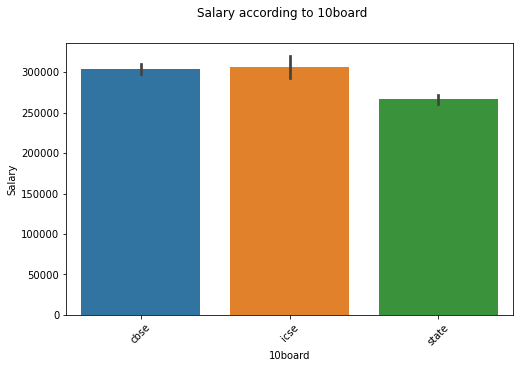

In [116]:
print(df1.groupby('10board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = '10board',y='Salary',data=df1)
plt.suptitle('Salary according to 10board')
plt.show()

In [117]:
#Observations:
#Salary of icse 10th board students is higher



### 7. Salary vs 12 board

12board
cbse     304755.017710
icse     316029.411765
state    266819.277108
Name: Salary, dtype: float64



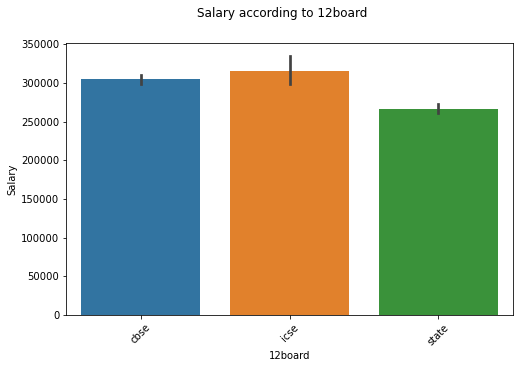

In [118]:
print(df1.groupby('12board')['Salary'].mean())

print()

plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x = '12board',y='Salary',data=df1)
plt.suptitle('Salary according to 12board')
plt.show()

In [119]:
#Observations:
#Salary of icse 12th board students is higher.



### 7. Salary vs gradage 

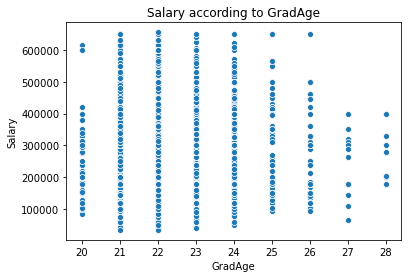

In [120]:
sns.scatterplot(df1['GradAge'],df1['Salary'])
plt.title('Salary according to GradAge')
plt.show()

In [121]:
# Observations:
# Salary of students having age 22 and 23 is higher.

## 8. Salary vs 12th age 

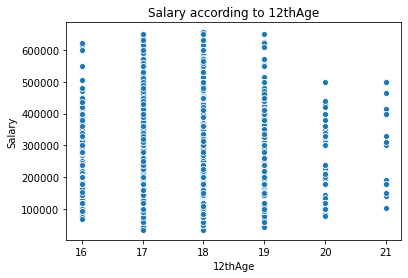

In [122]:
sns.scatterplot(df1['12thAge'],df1['Salary'])
plt.title('Salary according to 12thAge')
plt.show()

In [123]:
#salary of students having 18 and 19 is higher.

# Salary vs 10th Percentage

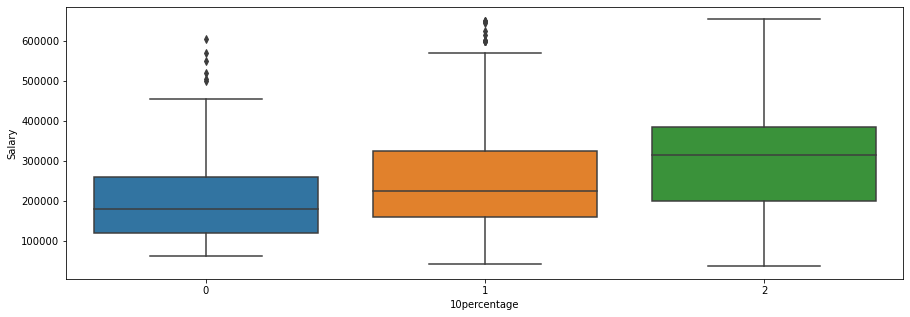

In [124]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['10percentage'],df1['Salary'])
plt.show()

In [125]:
# Salary of students with high 10th percentage is higher.

# Salary Vs 12th percentage

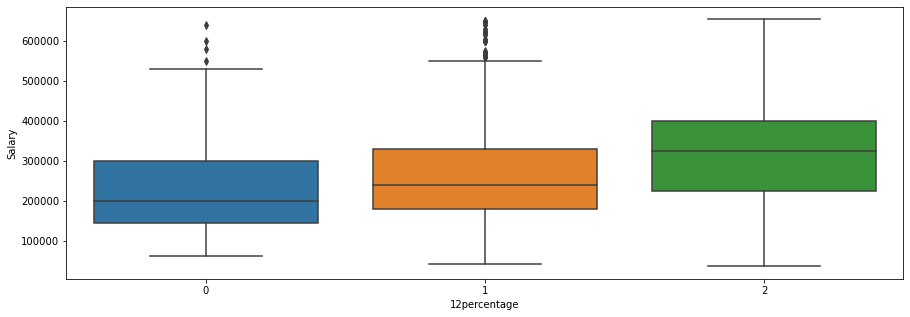

In [126]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['12percentage'],df1['Salary'])
plt.show()

In [127]:
#Salary of students with high 12th percentage is higher.

# Salary Vs CollegeGPA

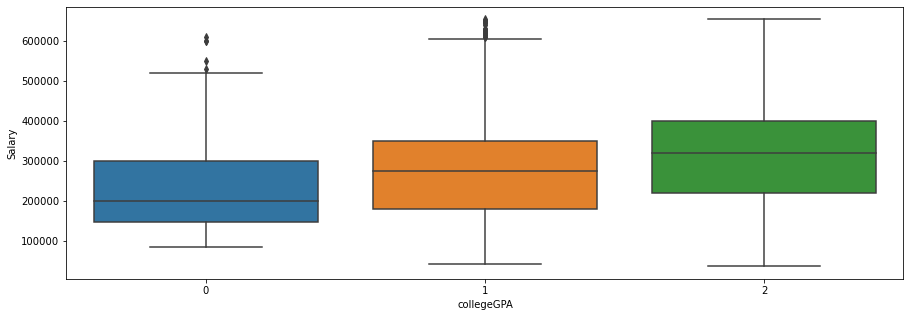

In [128]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['collegeGPA'],df1['Salary'])
plt.show()

In [129]:
#Salary of students with high college GPA is higher.

# Correlation

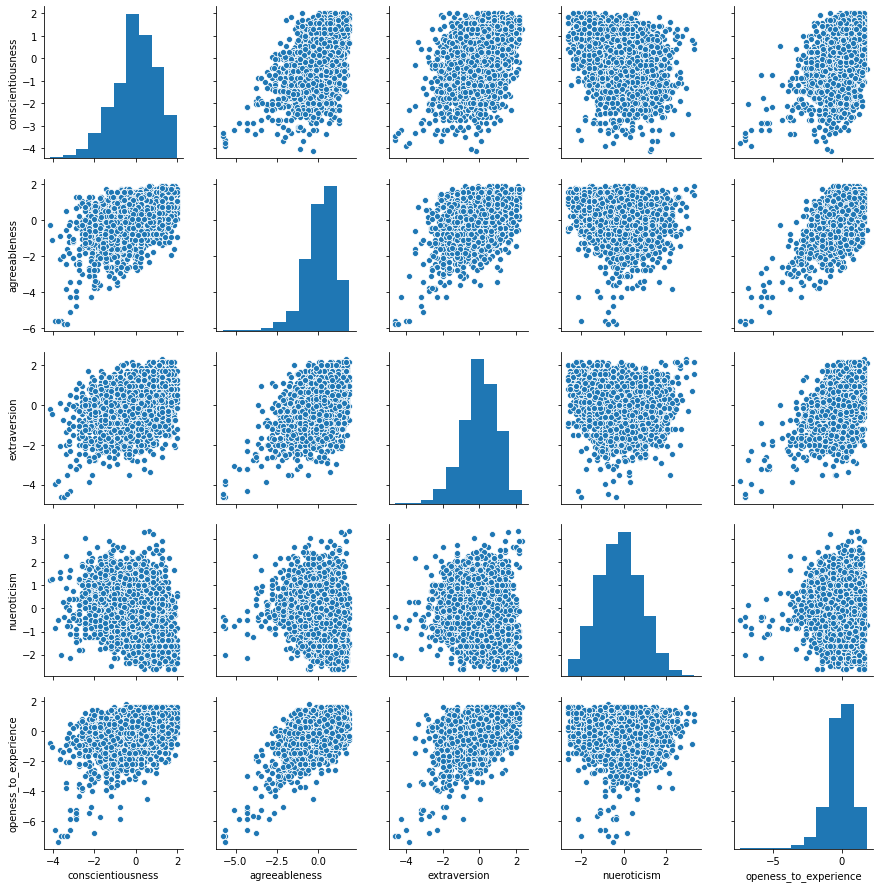

In [130]:
personality_scores=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

sns.pairplot(df1, vars = personality_scores)
plt.show()

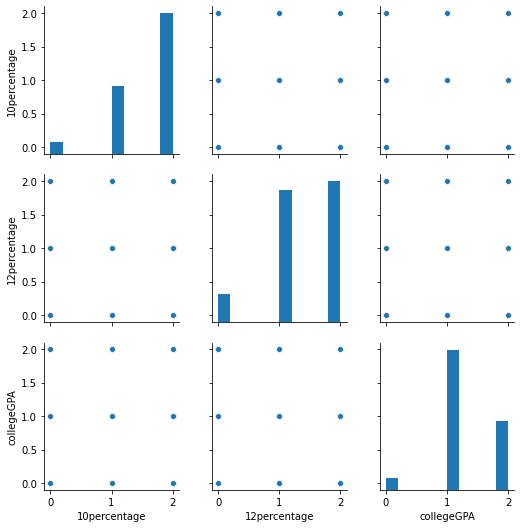

In [131]:
#Correlation of Academic scores

academic_performance = ['10percentage', '12percentage', 'collegeGPA']

sns.pairplot(df1, vars = academic_performance)
plt.show()

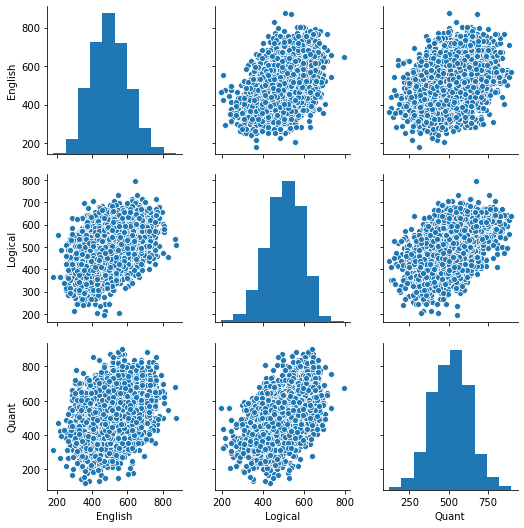

In [132]:
# Correlation of Standard Test Scores

std_test_scores = ['English', 'Logical', 'Quant']
sns.pairplot(df1, vars = std_test_scores)
plt.show()

In [133]:
# correlation b/w salary and all numerical feature

df1.drop(['Gender', 'CollegeTier', 'Degree', 'Specialization', 'CollegeState'],axis=1).corr()['Salary']

Salary                   1.000000
English                  0.252975
Logical                  0.248257
Quant                    0.345912
ComputerProgramming      0.164567
ElectronicsAndSemicon    0.026733
ComputerScience         -0.137958
MechanicalEngg           0.004208
ElectricalEngg          -0.049442
TelecomEngg             -0.004728
CivilEngg                0.029853
conscientiousness       -0.054722
agreeableness            0.062643
extraversion            -0.034006
nueroticism             -0.053930
openess_to_experience   -0.009578
12thAge                  0.008855
GradAge                 -0.057667
Name: Salary, dtype: float64

In [134]:
# Observation:
# None of the numerical feature is much correlated with Salary.

In [135]:
### Trying to find correlation with target variable by combining different features

# Creating new columns by taking average of std_test_scores and academic_performance
df1['Average_Score']=(df1['Logical']+df1['Quant']+df1['English'])/3

print(df1.drop(['Gender', 'CollegeTier', 'Degree', 'Specialization', 'CollegeState'],axis=1).corr()['Salary'])

Salary                   1.000000
English                  0.252975
Logical                  0.248257
Quant                    0.345912
ComputerProgramming      0.164567
ElectronicsAndSemicon    0.026733
ComputerScience         -0.137958
MechanicalEngg           0.004208
ElectricalEngg          -0.049442
TelecomEngg             -0.004728
CivilEngg                0.029853
conscientiousness       -0.054722
agreeableness            0.062643
extraversion            -0.034006
nueroticism             -0.053930
openess_to_experience   -0.009578
12thAge                  0.008855
GradAge                 -0.057667
Average_Score            0.364343
Name: Salary, dtype: float64


In [136]:
# Observation :
# Not much improved

In [137]:
#So we drop average score and acad_perf

In [138]:
df1.drop(['Average_Score'],axis=1,inplace=True)

In [139]:
# Thus from pairplots we can see our data has non-linearity and no multicollineaity

## Statistical Significance 

In [140]:
#Least correlated feature with salary is ElectronicsAndSemicon
#Thus using statistical tests we can check whether it is significant or not

In [141]:
from scipy.stats import shapiro,bartlett

In [142]:
shapiro(df1['ElectronicsAndSemicon'])

(0.6353672742843628, 0.0)

In [143]:
#As pvalue<0.05 thus it is not normal thus we apply non paramteric test. 
#As both salary and ElectronicsAndSemicon are numerical we use bartlett test to check its significance

In [144]:
bartlett(df1['ElectronicsAndSemicon'],df1['Salary'])

BartlettResult(statistic=46193.43238931856, pvalue=0.0)

In [145]:
#pvalue<0.05 Hence it is significant.
#Thus if least correlated feature is significant,we can say that all features are significant according to statistical test.
#Further analysis is needed.

### MULTICOLLINEARITY 

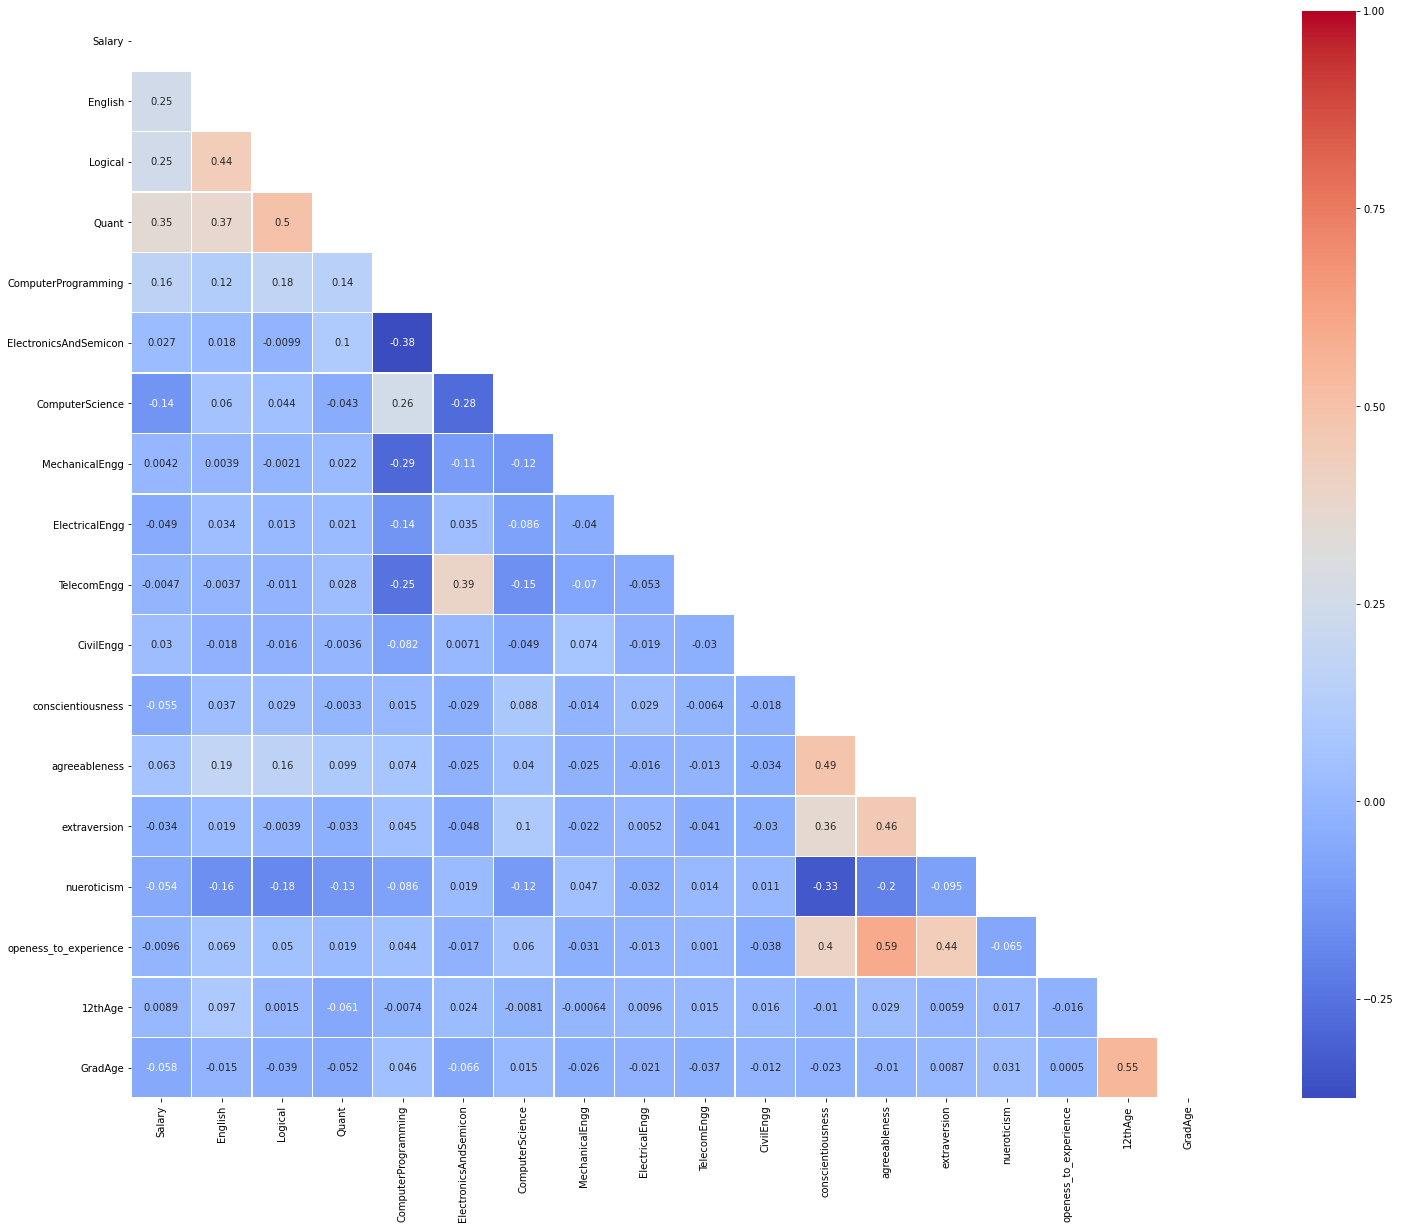

In [146]:
def corr_matrix(df):
    cr=df.corr()
    plt.figure(figsize=(30,20))
    mask=np.zeros_like(cr,dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True
    sns.heatmap(cr,annot=True,mask=mask,square=True,linewidths=0.5,cmap='coolwarm')
    plt.show()
corr_matrix(df1)    

In [147]:
#Multicollinearity is less in our dataset.

# Creating Dummy data for categorical variables

In [148]:
df1.head()

,Salary,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12thAge,GradAge
0,420000,f,2,state,2,state,2,UG,CS,2,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,17,21
1,500000,m,2,cbse,2,cbse,2,UG,EC,1,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,18,23
2,325000,f,2,cbse,1,cbse,2,UG,CS,1,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,18,22
4,200000,m,2,cbse,2,cbse,2,UG,EC,1,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,17,21
5,300000,m,2,state,2,state,2,UG,EC,2,...,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,18,22


In [149]:
df1.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'English', 'Logical', 'Quant',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', '12thAge', 'GradAge'],
      dtype='object')

In [150]:
df1['Degree'].value_counts()

UG    3574
PG     282
Name: Degree, dtype: int64

In [151]:
df1.head()

,Salary,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12thAge,GradAge
0,420000,f,2,state,2,state,2,UG,CS,2,...,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,17,21
1,500000,m,2,cbse,2,cbse,2,UG,EC,1,...,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,18,23
2,325000,f,2,cbse,1,cbse,2,UG,CS,1,...,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,18,22
4,200000,m,2,cbse,2,cbse,2,UG,EC,1,...,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,17,21
5,300000,m,2,state,2,state,2,UG,EC,2,...,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,18,22


In [152]:
categorical_features= ['Specialization', 'CollegeState', 'Gender', 'Degree','12board','10board','CollegeTier','CollegeCityTier']

In [153]:
df2 = pd.get_dummies(df1, columns = categorical_features,drop_first=True)

In [154]:
df2.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,...,CollegeState_Other_Zone,CollegeState_South_Zone.,Gender_m,Degree_UG,12board_icse,12board_state,10board_icse,10board_state,CollegeTier_2,CollegeCityTier_1
0,420000,2,2,2,515,585,525,445,0,0,...,0,1,0,1,0,1,0,1,1,0
1,500000,2,2,1,695,610,780,0,466,0,...,1,0,1,1,0,0,0,0,1,0
2,325000,2,1,1,615,545,370,395,0,0,...,0,0,0,1,0,0,0,0,1,0
4,200000,2,2,1,545,625,465,0,233,0,...,0,0,1,1,0,0,0,0,1,0
5,300000,2,2,2,560,555,620,645,0,407,...,0,1,1,1,0,1,0,1,1,0


In [155]:
#-------------------------------------TRY-------------------------------------------------------

In [156]:
#Label encoding to all the categorical columns based on the target(salary)

In [157]:
#1.Gender

In [158]:
# df1.groupby('Gender')['Salary'].median()

In [159]:
# As median salary of males=median salary of females so we can label male, female as 0, 1 respectively or vice-versa.

In [160]:
# df1['Gender'].replace({'f':0,'m':1},inplace=True)

In [161]:
# df1.head()

In [162]:
# 2. 10th board

In [163]:
# df1.groupby('10board')['Salary'].median()

In [164]:
# As median salary of icse 10th board is high followed by cbse and state so we can label it as state-0, cbse-1, icse-2

In [165]:
# df1['10board'].replace({'state':0,'cbse':1,'icse':2},inplace=True)

In [166]:
#3.12th board

In [167]:
# df1.groupby('12board')['Salary'].median()

In [168]:
# As median salary of icse 12th board is high followed by cbse and state so we can label it as state-0, cbse-1, icse-2

In [169]:
# df1['12board'].replace({'state':0,'cbse':1,'icse':2},inplace=True)

In [170]:
#4.Degree

In [171]:
# df1.groupby('Degree')['Salary'].median()

In [172]:
#As median salary of UG>PG, so we can label it as PG-0, UG-1

In [173]:
# df1['Degree'].replace({'PG':0,'UG':1},inplace=True)

In [174]:
# df1.head()

In [175]:
#5. Specialization

In [176]:
# df1.groupby('Specialization')['Salary'].median()

In [177]:
#Median salary of CS> EC and others so we can label it as other-0, CS-1, EC-1

In [178]:
# df1['Specialization'].replace({'other':0,'CS':1,'EC':1},inplace=True)

In [179]:
#6. CollegeState

In [180]:
# df1.groupby('CollegeState')['Salary'].median()

In [181]:
#Median salary of other zones and south zones is more as compared to north zone so we can label it as north zone-0
#south zone-1 and other zones-1

In [182]:
# df1['CollegeState'].replace({'North_Zone.':0,'South_Zone.':1,'Other_Zone':1},inplace=True)

In [183]:
# df1.head()

In [184]:
# df1.info()

In [185]:
# df1['collegeGPA'].dtype

In [186]:
# df2 = pd.get_dummies(df1, columns = ['Gender','Degree','Specialization','CollegeState'],drop_first=True)

------------------------------------

In [187]:
#Creating 2 buckets for salary as salary above average and below average.

1    2133
2    1723
Name: Salary, dtype: int64


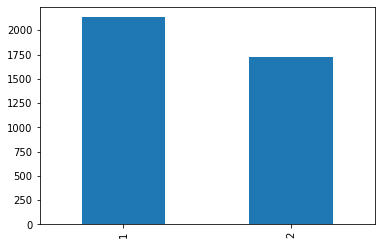

In [188]:
salary_cat = pd.qcut(df2['Salary'], [0, .5, 1],labels=[1,2])
print(salary_cat.value_counts())
salary_cat.value_counts().plot(kind = 'bar')
plt.show()

In [189]:
df2['Salary']=salary_cat

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')
# from sklearn.preprocessing import StandardScaler

In [191]:
# ss=StandardScaler()

In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 0 to 3997
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Salary                    3856 non-null   category
 1   10percentage              3856 non-null   category
 2   12percentage              3856 non-null   category
 3   collegeGPA                3856 non-null   category
 4   English                   3856 non-null   int64   
 5   Logical                   3856 non-null   int64   
 6   Quant                     3856 non-null   int64   
 7   ComputerProgramming       3856 non-null   int64   
 8   ElectronicsAndSemicon     3856 non-null   int64   
 9   ComputerScience           3856 non-null   int64   
 10  MechanicalEngg            3856 non-null   int64   
 11  ElectricalEngg            3856 non-null   int64   
 12  TelecomEngg               3856 non-null   int64   
 13  CivilEngg                 3856 non-null   int64 

In [193]:
# As XGBoost doesnt accept category datatype so we have to cast its data type to int/float/bool.

In [194]:
cat_dtype=['Salary','10percentage','12percentage','collegeGPA']
for i in cat_dtype:
    df2[i]=pd.to_numeric(df2[i],errors='coerce')

In [195]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 0 to 3997
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Salary                    3856 non-null   int64  
 1   10percentage              3856 non-null   int64  
 2   12percentage              3856 non-null   int64  
 3   collegeGPA                3856 non-null   int64  
 4   English                   3856 non-null   int64  
 5   Logical                   3856 non-null   int64  
 6   Quant                     3856 non-null   int64  
 7   ComputerProgramming       3856 non-null   int64  
 8   ElectronicsAndSemicon     3856 non-null   int64  
 9   ComputerScience           3856 non-null   int64  
 10  MechanicalEngg            3856 non-null   int64  
 11  ElectricalEngg            3856 non-null   int64  
 12  TelecomEngg               3856 non-null   int64  
 13  CivilEngg                 3856 non-null   int64  
 14  conscien

In [196]:
X=df2.drop('Salary',axis=1)
y=df2['Salary']

In [197]:
# X_scaled=ss.fit_transform(X)

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

## Logistic Regression

In [199]:
lr=LogisticRegression() 
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1267  431]
 [ 522  864]]
AUC of train: 0.7488000482700129
Accuracy of train: 0.6909857328145266



Confusion matrix 
 [[326 109]
 [122 215]]
AUC of test: 0.7645895153313552
Accuracy of test: 0.7007772020725389



Classification report: 
               precision    recall  f1-score   support

           1       0.73      0.75      0.74       435
           2       0.66      0.64      0.65       337

    accuracy                           0.70       772
   macro avg       0.70      0.69      0.69       772
weighted avg       0.70      0.70      0.70       772



In [200]:
def cf_matrix1(ytest,ypred):
    cf_matrix=confusion_matrix(ytest,ypred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

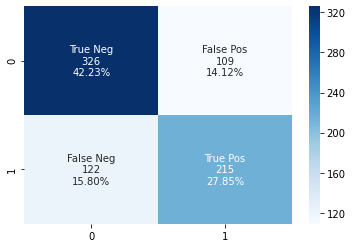

In [201]:
cf_matrix1(y_test,y_test_pred)

-----------------------------------------------------------------------

In [202]:
#Applying customised grid search for appropriate output

In [203]:
LR=LogisticRegression()

In [204]:
auc_avg=[]
auc_var=[]
model=LogisticRegression()
kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
score = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
auc_avg.append(1-np.mean(score))
auc_var.append(np.var(score,ddof=1))

In [205]:
print("Bias error is {}".format(auc_avg))
print("Variance error is {}".format(auc_var))

Bias error is [0.2602130666938951]
Variance error is [0.000385866665499739]


In [206]:
roc_score=[]
model=LogisticRegression()
kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
score = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,n_jobs=-1,scoring='roc_auc')
roc_score.append(round(score.mean(),5))

In [207]:
roc_score #Cross validation score

[0.74106]

In [208]:
#With Logistic Regression
#Bias error is less i.e. 0.2622

--------------

## Decision Tree Classifier 

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [210]:
dtree=DecisionTreeClassifier(random_state=0)

In [211]:
param_dt={'max_depth':np.arange(1,50),'criterion':['gini','entropy'],'min_samples_leaf':np.arange(2,15)}

In [212]:
gsearch=GridSearchCV(dtree,param_grid=param_dt,scoring='roc_auc',cv=3)

In [213]:
gsearch.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='depre...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 

In [214]:
gsearch.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

In [215]:
dtree=DecisionTreeClassifier(**gsearch.best_params_) 
dtree.fit(X_train,y_train)
y_train_pred=dtree.predict(X_train)
y_train_prob=dtree.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of test:",roc_auc_score(y_train,y_train_prob))


y_test_pred=dtree.predict(X_test)
y_test_prob=dtree.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1320  378]
 [ 573  813]]
Accuracy of train: 0.6916342412451362
AUC of test: 0.7460525667239448



Confusion matrix 
 [[323 112]
 [139 198]]
Accuracy of test: 0.6748704663212435
AUC of test: 0.7200723080596201



Classification report: 
               precision    recall  f1-score   support

           1       0.70      0.74      0.72       435
           2       0.64      0.59      0.61       337

    accuracy                           0.67       772
   macro avg       0.67      0.67      0.67       772
weighted avg       0.67      0.67      0.67       772



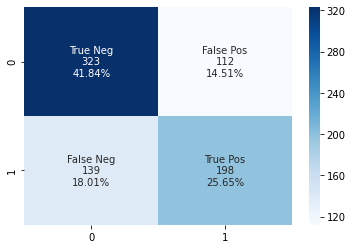

In [216]:
cf_matrix1(y_test,y_test_pred)

---------------------

## Random Forest Classifier

In [217]:
from sklearn.model_selection import RandomizedSearchCV

In [218]:
from scipy.stats import randint as sp_randint
rf=RandomForestClassifier(random_state=1)
params={
    'n_estimators':sp_randint(50,250),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,20),
    'min_samples_split':sp_randint(2,20),
    'criterion':['gini','entropy'],
    'max_features':sp_randint(2,31)}

rsearch=RandomizedSearchCV(estimator=rf,param_distributions=params,cv=3,scoring='roc_auc',random_state=1)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [219]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 8,
 'min_samples_leaf': 19,
 'min_samples_split': 7,
 'n_estimators': 196}

In [221]:
rf=RandomForestClassifier(**rsearch.best_params_,random_state=1) 
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: \n",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1371  327]
 [ 511  875]]
Accuracy of train: 0.7282749675745784
AUC of train: 0.8114550349532681



Confusion matrix 
 [[337  98]
 [126 211]]
Accuracy of test: 0.7098445595854922
AUC of test: 0.7722841843173369



Classification report: 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75       435
           2       0.68      0.63      0.65       337

    accuracy                           0.71       772
   macro avg       0.71      0.70      0.70       772
weighted avg       0.71      0.71      0.71       772



In [222]:
rf.feature_importances_

array([0.06459136, 0.09908484, 0.0171628 , 0.09416583, 0.07148157,
       0.25755813, 0.12516603, 0.01017101, 0.03090223, 0.00128352,
       0.00071777, 0.00165592, 0.        , 0.02733039, 0.02753354,
       0.02576248, 0.02779902, 0.03686511, 0.00698379, 0.00823076,
       0.00371557, 0.00113613, 0.00511385, 0.00452959, 0.00370052,
       0.00359958, 0.00120002, 0.00934925, 0.00091973, 0.00936757,
       0.01810762, 0.00481445])

In [223]:
X_train.columns

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', '12thAge', 'GradAge',
       'Specialization_EC', 'Specialization_other', 'CollegeState_Other_Zone',
       'CollegeState_South_Zone.', 'Gender_m', 'Degree_UG', '12board_icse',
       '12board_state', '10board_icse', '10board_state', 'CollegeTier_2',
       'CollegeCityTier_1'],
      dtype='object')

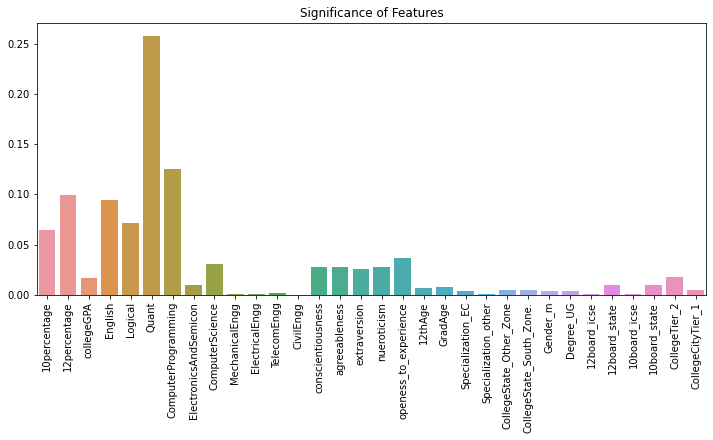

In [230]:
plt.figure(figsize=(12,5))
sns.barplot(x=X_train.columns,y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Significance of Features')
plt.show()

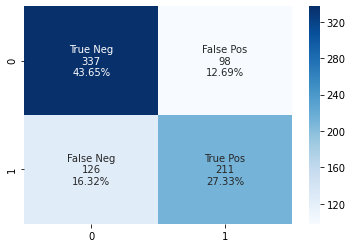

In [231]:
cf_matrix1(y_test,y_test_pred)

In [232]:
#Random forest classifier is giving best result till now!!

-----------------------------

## XGBClassifier

In [233]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [234]:
params1={'max_depth':np.arange(1,20),'learning_rate':np.arange(0.1,1),'min_child_weight':np.arange(1,15),
       'gamma':np.arange(1,5)}

In [235]:
xgb=XGBClassifier()

In [236]:
rsearch=RandomizedSearchCV(estimator=xgb,param_distributions=params1,cv=10,scoring='roc_auc',n_jobs=-1)

In [237]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'gamma': array([1, 2, 3, 4]),
                                   

In [238]:
rsearch.best_params_

{'min_child_weight': 14, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1}

In [239]:
xgb=XGBClassifier(**rsearch.best_params_,random_state=1) 
xgb.fit(X_train,y_train)
y_train_pred=xgb.predict(X_train)
y_train_prob=xgb.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=xgb.predict(X_test)
y_test_prob=xgb.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1364  334]
 [ 447  939]]
Accuracy of train: 0.746757457846952
AUC of train: 0.8262037334475497



Confusion matrix 
 [[330 105]
 [121 216]]
Accuracy of test: 0.7072538860103627
AUC of test: 0.773184624305058



Classification report: '
'               precision    recall  f1-score   support

           1       0.73      0.76      0.74       435
           2       0.67      0.64      0.66       337

    accuracy                           0.71       772
   macro avg       0.70      0.70      0.70       772
weighted avg       0.71      0.71      0.71       772



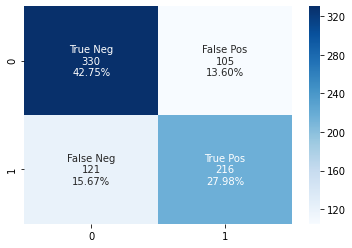

In [240]:
cf_matrix1(y_test,y_test_pred)

In [241]:
#Train score improved but no change in test score as compared to Random forest.

------------------------------------------------------------

In [242]:
#Bagging and boosting

## Boosted LR

In [243]:
LR=LogisticRegression()

In [244]:
lr_boost=AdaBoostClassifier(base_estimator=LR,random_state=1)
lr_boost.fit(X_train,y_train)
y_train_pred=lr_boost.predict(X_train)
y_train_prob=lr_boost.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=lr_boost.predict(X_test)
y_test_prob=lr_boost.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1289  409]
 [ 526  860]]
Accuracy of train: 0.6968223086900129
AUC of train: 0.7573611769724844



Confusion matrix 
 [[329 106]
 [123 214]]
Accuracy of test: 0.7033678756476683
AUC of test: 0.7654285616835499



Classification report: '
'               precision    recall  f1-score   support

           1       0.73      0.76      0.74       435
           2       0.67      0.64      0.65       337

    accuracy                           0.70       772
   macro avg       0.70      0.70      0.70       772
weighted avg       0.70      0.70      0.70       772



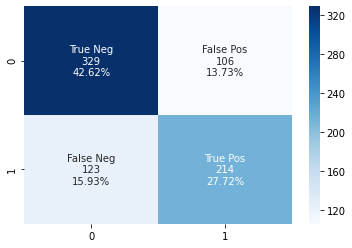

In [245]:
cf_matrix1(y_test,y_test_pred)

## Bagged LR

In [246]:
lr_bag=BaggingClassifier(base_estimator=LR,random_state=1)
lr_bag.fit(X_train,y_train)
y_train_pred=lr_bag.predict(X_train)
y_train_prob=lr_bag.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=lr_bag.predict(X_test)
y_test_prob=lr_bag.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1279  419]
 [ 548  838]]
Accuracy of train: 0.6864461738002594
AUC of train: 0.7500582129557395



Confusion matrix 
 [[332 103]
 [126 211]]
Accuracy of test: 0.7033678756476683
AUC of test: 0.7657969234967087



Classification report: '
'               precision    recall  f1-score   support

           1       0.72      0.76      0.74       435
           2       0.67      0.63      0.65       337

    accuracy                           0.70       772
   macro avg       0.70      0.69      0.70       772
weighted avg       0.70      0.70      0.70       772



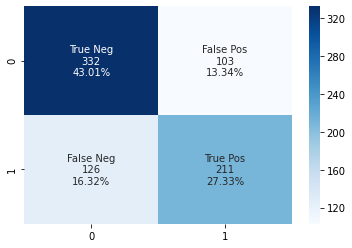

In [247]:
cf_matrix1(y_test,y_test_pred)

-------------------------------------

## Boosted DT

In [248]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=13)

In [249]:
DT_boost=AdaBoostClassifier(base_estimator=DT,random_state=1)
DT_boost.fit(X_train,y_train)
y_train_pred=DT_boost.predict(X_train)
y_train_prob=DT_boost.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=DT_boost.predict(X_test)
y_test_prob=DT_boost.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1595  103]
 [ 105 1281]]
Accuracy of train: 0.9325551232166018
AUC of train: 0.9865893496635547



Confusion matrix 
 [[296 139]
 [130 207]]
Accuracy of test: 0.6515544041450777
AUC of test: 0.6862239503393703



Classification report: '
'               precision    recall  f1-score   support

           1       0.69      0.68      0.69       435
           2       0.60      0.61      0.61       337

    accuracy                           0.65       772
   macro avg       0.65      0.65      0.65       772
weighted avg       0.65      0.65      0.65       772



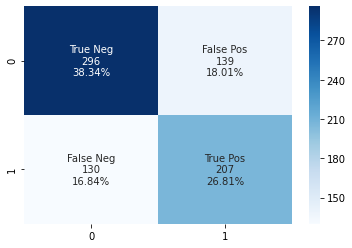

In [250]:
cf_matrix1(y_test,y_test_pred)

In [251]:
#Overfitting!!!

## Bagged DT

In [252]:
DT_bag=BaggingClassifier(base_estimator=DT,random_state=1)
DT_bag.fit(X_train,y_train)
y_train_pred=DT_bag.predict(X_train)
y_train_prob=DT_bag.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=DT_bag.predict(X_test)
y_test_prob=DT_bag.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1341  357]
 [ 569  817]]
Accuracy of train: 0.6997405966277561
AUC of train: 0.7737940145183961



Confusion matrix 
 [[330 105]
 [132 205]]
Accuracy of test: 0.6930051813471503
AUC of test: 0.7493468399331492



Classification report: '
'               precision    recall  f1-score   support

           1       0.71      0.76      0.74       435
           2       0.66      0.61      0.63       337

    accuracy                           0.69       772
   macro avg       0.69      0.68      0.68       772
weighted avg       0.69      0.69      0.69       772



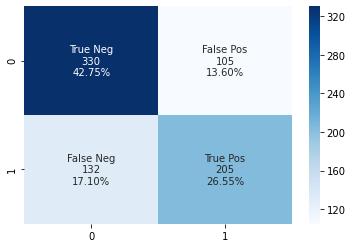

In [253]:
cf_matrix1(y_test,y_test_pred)

-----------------

## Boosted Random Forest

In [254]:
RF=RandomForestClassifier(criterion='entropy',max_depth=6,max_features=8,min_samples_leaf=19,min_samples_split=7,
n_estimators=196)

In [255]:
RF_boost=AdaBoostClassifier(base_estimator=RF,random_state=1)
RF_boost.fit(X_train,y_train)
y_train_pred=RF_boost.predict(X_train)
y_train_prob=RF_boost.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=RF_boost.predict(X_test)
y_test_prob=RF_boost.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1698    0]
 [   1 1385]]
Accuracy of train: 0.9996757457846952
AUC of train: 0.9999983003516573



Confusion matrix 
 [[314 121]
 [121 216]]
Accuracy of test: 0.6865284974093264
AUC of test: 0.7549848221289949



Classification report: '
'               precision    recall  f1-score   support

           1       0.72      0.72      0.72       435
           2       0.64      0.64      0.64       337

    accuracy                           0.69       772
   macro avg       0.68      0.68      0.68       772
weighted avg       0.69      0.69      0.69       772



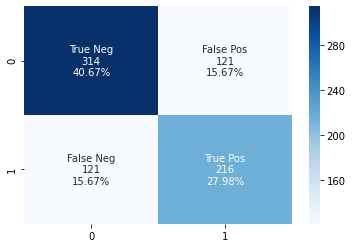

In [256]:
cf_matrix1(y_test,y_test_pred)

In [257]:
# Overfitting!

## Bagged Random Forest

In [258]:
RF_bag=BaggingClassifier(base_estimator=RF,random_state=1)
RF_bag.fit(X_train,y_train)
y_train_pred=RF_bag.predict(X_train)
y_train_prob=RF_bag.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=RF_bag.predict(X_test)
y_test_prob=RF_bag.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1361  337]
 [ 517  869]]
Accuracy of train: 0.7230869001297017
AUC of train: 0.7987038481738128



Confusion matrix 
 [[341  94]
 [124 213]]
Accuracy of test: 0.7176165803108808
AUC of test: 0.7744261400457043



Classification report: '
'               precision    recall  f1-score   support

           1       0.73      0.78      0.76       435
           2       0.69      0.63      0.66       337

    accuracy                           0.72       772
   macro avg       0.71      0.71      0.71       772
weighted avg       0.72      0.72      0.72       772



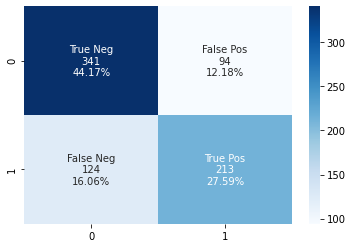

In [259]:
cf_matrix1(y_test,y_test_pred)

## Gradient Boosting Classifier 

In [260]:
GBclassifier=GradientBoostingClassifier(random_state=1)

In [261]:
params={
    'n_estimators':sp_randint(50,250),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,20),
    'min_samples_split':sp_randint(2,20),
    'max_features':sp_randint(2,31)}

rsearch=RandomizedSearchCV(estimator=GBclassifier,param_distributions=params,cv=3,scoring='roc_auc',random_state=1)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [262]:
rsearch.best_params_

{'max_depth': 2,
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 199}

In [263]:
gb=GradientBoostingClassifier(**rsearch.best_params_,random_state=1) 
gb.fit(X_train,y_train)
y_train_pred=gb.predict(X_train)
y_train_prob=gb.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=gb.predict(X_test)
y_test_prob=gb.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1368  330]
 [ 453  933]]
Accuracy of train: 0.7461089494163424
AUC of train: 0.8236334402412142



Confusion matrix 
 [[330 105]
 [124 213]]
Accuracy of test: 0.7033678756476683
AUC of test: 0.7676182680173267



Classification report: '
'               precision    recall  f1-score   support

           1       0.73      0.76      0.74       435
           2       0.67      0.63      0.65       337

    accuracy                           0.70       772
   macro avg       0.70      0.70      0.70       772
weighted avg       0.70      0.70      0.70       772



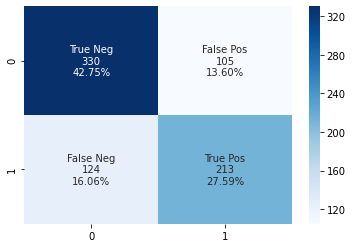

In [264]:
cf_matrix1(y_test,y_test_pred)

## AdaBoost Classifier

In [265]:
adaboost=AdaBoostClassifier(random_state=1)

In [266]:
params={'n_estimators':np.arange(1,100),'learning_rate':np.arange(0.1,1)}

In [267]:
rsearch=RandomizedSearchCV(estimator=adaboost,param_distributions=params,cv=3,scoring='roc_auc',random_state=1)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=1),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': array([0.1]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 9

In [268]:
Adaboost=AdaBoostClassifier(**rsearch.best_params_,random_state=1) 
Adaboost.fit(X_train,y_train)
y_train_pred=Adaboost.predict(X_train)
y_train_prob=Adaboost.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=Adaboost.predict(X_test)
y_test_prob=Adaboost.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print('\n'*2)
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1295  403]
 [ 531  855]]
Accuracy of train: 0.6971465629053177
AUC of train: 0.7639235192238727



Confusion matrix 
 [[339  96]
 [130 207]]
Accuracy of test: 0.7072538860103627
AUC of test: 0.7809782052593881



Classification report: '
'               precision    recall  f1-score   support

           1       0.72      0.78      0.75       435
           2       0.68      0.61      0.65       337

    accuracy                           0.71       772
   macro avg       0.70      0.70      0.70       772
weighted avg       0.71      0.71      0.70       772



In [269]:
rsearch.best_params_

{'n_estimators': 92, 'learning_rate': 0.1}

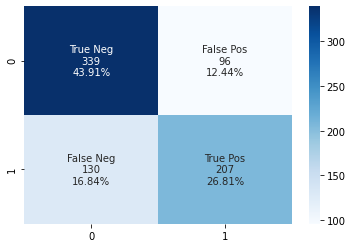

In [270]:
cf_matrix1(y_test,y_test_pred)

In [271]:
# AdaBoost is giving good score wrt train and validation.

## LightGBM

In [272]:
import lightgbm as lgb

In [273]:
lgbmc=lgb.LGBMClassifier(random_state=1)

lgbmc.fit(X_train,y_train)


y_train_pred=lgbmc.predict(X_train)
y_train_prob=lgbmc.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=lgbmc.predict(X_test)
y_test_prob=lgbmc.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1647   51]
 [  70 1316]]
Accuracy of train: 0.9607652399481194
AUC of train: 0.9926545447746861



Confusion matrix 
 [[325 110]
 [130 207]]
Accuracy of test: 0.689119170984456
AUC of test: 0.7496572188683106
Classification report: '
'               precision    recall  f1-score   support

           1       0.71      0.75      0.73       435
           2       0.65      0.61      0.63       337

    accuracy                           0.69       772
   macro avg       0.68      0.68      0.68       772
weighted avg       0.69      0.69      0.69       772



In [274]:
#Overfitting

In [275]:
#Tuning

In [276]:
lgbmc=lgb.LGBMClassifier(random_state=1)
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
params={
    'n_estimators':sp_randint(50,250),
    'max_depth':sp_randint(2,10),
    'min_child_samples':sp_randint(1,20),
    'num_leaves':sp_randint(10,50),
    'learning_rate':[0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2]}

rsearch=RandomizedSearchCV(estimator=lgbmc,param_distributions=params,cv=3,scoring='roc_auc',random_state=1)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=1, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=...
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019

In [277]:
rsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_samples': 14,
 'n_estimators': 165,
 'num_leaves': 28}

In [278]:
lgbmc=lgb.LGBMClassifier(**rsearch.best_params_,random_state=1) 
lgbmc.fit(X_train,y_train)
y_train_pred=lgbmc.predict(X_train)
y_train_prob=lgbmc.predict_proba(X_train)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))
print("AUC of train:",roc_auc_score(y_train,y_train_prob))


y_test_pred=lgbmc.predict(X_test)
y_test_prob=lgbmc.predict_proba(X_test)[:,1]

print('\n'*2)
print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print("Accuracy of test:",accuracy_score(y_test,y_test_pred))
print("AUC of test:",roc_auc_score(y_test,y_test_prob))
print("Classification report: '\n'",classification_report(y_test,y_test_pred))

Confusion matrix 
 [[1366  332]
 [ 445  941]]
Accuracy of train: 0.7480544747081712
AUC of train: 0.8217710505696371



Confusion matrix 
 [[329 106]
 [126 211]]
Accuracy of test: 0.6994818652849741
AUC of test: 0.7752037927623725
Classification report: '
'               precision    recall  f1-score   support

           1       0.72      0.76      0.74       435
           2       0.67      0.63      0.65       337

    accuracy                           0.70       772
   macro avg       0.69      0.69      0.69       772
weighted avg       0.70      0.70      0.70       772



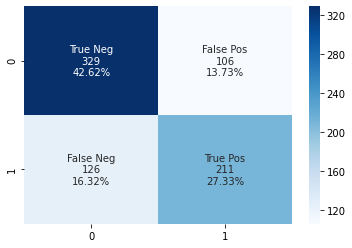

In [279]:
cf_matrix1(y_test,y_test_pred)

## Model comparison

In [280]:
LR=LogisticRegression()
lr_bag=BaggingClassifier(base_estimator=LR,random_state=1)
Boost_LR=AdaBoostClassifier(base_estimator=LR,random_state=1)
DT=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=13)
DT_boost=AdaBoostClassifier(base_estimator=DT,random_state=1)
DT_bag=BaggingClassifier(base_estimator=DT,random_state=1)
RF=RandomForestClassifier(criterion='entropy',max_depth=6,max_features=8,min_samples_leaf=19,min_samples_split=7,
n_estimators=196)
RF_bagged=BaggingClassifier(base_estimator=RF,random_state=1)
lgbmc=lgb.LGBMClassifier(learning_rate=0.1,max_depth=2,min_child_samples=14,n_estimators=165,num_leaves=28)
gb=GradientBoostingClassifier(max_depth=2,max_features=9,min_samples_leaf=4,min_samples_split=8,n_estimators=199)
AdaBoost=AdaBoostClassifier(n_estimators=92,learning_rate=0.1)
XGB=XGBClassifier(min_child_weight=4,max_depth=4,learning_rate=0.1,gamma=1)
stacked=VotingClassifier(estimators = [('GB',gb),('LightGBM',lgbmc),('XGB',XGB)],voting='soft',weights=[2,2,1],flatten_transform=True)


In [281]:
models=[]
models.append(('LR',LR))
models.append(('LR_Bagged',lr_bag))
models.append(('Boost_LR',Boost_LR))
models.append(('DT',DT))
models.append(('DT_Boost',DT_boost))
models.append(('DT_Bagged',DT_bag))
models.append(('RF',RF))
models.append(('RF_Bagged',RF_bagged))
models.append(('LGBM',lgbmc))
models.append(('GB',gb))
models.append(('AdaBoost',AdaBoost))
models.append(('XGB',XGB))
models.append(('stacked',stacked))

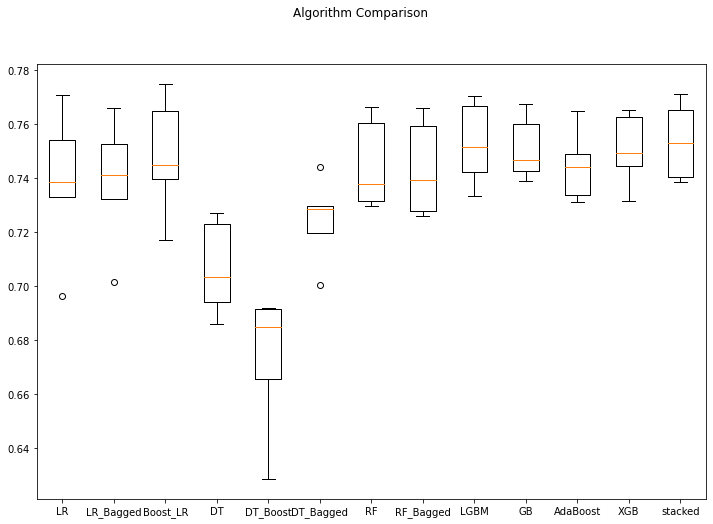

,Classifiers,Bias Error,Variance error,AUC CV Score
12,stacked,0.246453,0.000212,0.753547
8,LGBM,0.247273,0.000244,0.752727
9,GB,0.248974,0.000146,0.751026
11,XGB,0.249517,0.000191,0.750483
2,Boost_LR,0.251904,0.000513,0.748096
6,RF,0.254870,0.000291,0.745130
10,AdaBoost,0.255591,0.000181,0.744409
7,RF_Bagged,0.256451,0.000332,0.743549
1,LR_Bagged,0.261357,0.000591,0.738643
0,LR,0.261519,0.000773,0.738481


In [282]:
results = []
names = []
Classifiers_df=pd.DataFrame(columns=['Classifiers','Bias Error','Variance error','AUC CV Score'])
i=0
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
#     print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.var(cv_results,ddof=1)))
    Classifiers_df.loc[i]=[name,1-np.mean(cv_results),np.var(cv_results,ddof=1),np.mean(cv_results)]
    i=i+1
    
#    boxplot algorithm comparison
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
Classifiers_df.sort_values(by='AUC CV Score',ascending=False)

In [1]:
#From this comparison, LGBM cv score is highest.

# Applying model on the Test Data.

In [285]:
test = pd.read_csv("test_data_finale.csv")

In [286]:
test

,10percentage,12percentage,collegeGPA,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,...,CollegeState_Other_Zone,CollegeState_South_Zone.,Gender_m,Degree_UG,12board_icse,12board_state,10board_icse,10board_state,CollegeTier_2,CollegeCityTier_1
0,1,1,1,510,460,620,385,266,0,0,...,0,0,1,1,0,0,0,0,1,0
1,2,1,1,535,605,655,545,0,253,0,...,0,0,1,1,0,1,0,1,1,0
2,2,2,2,745,690,655,655,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,2,2,1,325,455,415,535,0,469,0,...,0,1,0,1,0,1,0,1,1,0
4,2,2,1,475,395,435,525,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2,2,2,454,635,485,695,0,0,0,...,0,1,1,1,0,1,0,1,1,0
1496,2,2,2,535,535,635,0,333,0,0,...,1,0,1,1,0,0,0,0,1,0
1497,2,2,1,415,445,615,435,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1498,1,1,1,325,535,605,305,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [287]:
test.isnull().sum().sum()

0

In [288]:
lgbmc=lgb.LGBMClassifier(**rsearch.best_params_,random_state=1) 
lgbmc.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=14, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=165, n_jobs=-1, num_leaves=28, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [289]:
Salary_prediction = lgbmc.predict(test)

In [290]:
result = pd.read_excel('results.xlsx')

In [291]:
result['Salary']= Salary_prediction

In [292]:
result

,ID,Salary
0,664736,1
1,1123290,1
2,1062444,2
3,1072028,1
4,267259,2
...,...,...
1495,407755,2
1496,575154,2
1497,216598,2
1498,919755,1
